In [563]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import cufflinks as cf
plotly_plot_mode = 'offline_jupyter'
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (15.0, 8.0)
import warnings
warnings.filterwarnings('ignore')

In [625]:
cardf_original = pd.read_csv('car_emission_data.csv',encoding='cp1252')#This is to keep the unmodified source if incase we need it later
cardf = pd.read_csv('car_emission_data.csv',encoding='cp1252')#This is for manipulation and analysis

In [626]:
cardf.head()

Manufacturer                                     Model  \
0   ALFA ROMEO     MiTo Series 3, September 2016 Onwards   
1          BMW  1 Series 3-door F21, From September 2012   
2          BMW  1 Series 5-door F20, From September 2011   
3      CITROEN                                        C4   
4      CITROEN                                 C4 Cactus   

               Description Transmission  Engine Capacity Fuel Type  \
0        1.3 JTDm-2 95 bhp           M5           1248.0    Diesel   
1  116d ED Plus 16'' tyres           M6           1496.0    Diesel   
2  116d ED Plus 16'' tyres           M6           1496.0    Diesel   
3          BlueHDi 100 S&S           M5           1560.0    Diesel   
4     BlueHDi 100 S&S ETG6         AMT6           1560.0    Diesel   

   Electric energy consumption Miles/kWh  wh/km  Maximum range (Km)  \
0                                    NaN    NaN                 NaN   
1                                    NaN    NaN                 NaN   
2                                    NaN    NaN                 NaN   
3                                    NaN    NaN                 NaN   
4                                    NaN    NaN                 NaN   

   Maximum range (Miles)  Metric Urban (Cold)  Metric Extra-Urban  \
0                    NaN                  4.3                 2.9   
1                    NaN                  3.9                 3.1   
2                    NaN                  3.9                 3.1   
3                    NaN                  3.7                 3.1   
4                    NaN                  3.9                 3.2   

   Metric Combined  Imperial Urban (Cold)  Imperial Extra-Urban  \
0              3.4                   65.7                  97.4   
1              3.4                   72.4                  91.1   
2              3.4                   72.4                  91.1   
3              3.3                   76.3                  91.1   
4              3.4                   72.4                  88.3   

   Imperial Combined  CO2 g/km Fuel Cost 12000 Miles Electricity cost  \
0               83.1        89                  £807              NaN   
1               83.1        89                  £807              NaN   
2               83.1        89                  £807              NaN   
3               85.6        86                  £784              NaN   
4               83.1        89                  £807              NaN   

  Total cost / 12000 miles  Euro Standard  Noise Level dB(A)  \
0                     £807              6               67.5   
1                     £807              6               68.0   
2                     £807              6               68.0   
3                     £784              6               68.8   
4                     £807              6               69.2   

   Emissions CO [mg/km]  THC Emissions [mg/km]  Emissions NOx [mg/km]  \
0                 234.0                    NaN                   67.0   
1                 119.0                    NaN                   37.0   
2                 119.0                    NaN                   37.0   
3                 272.0                    NaN                   55.0   
4                 185.0                    NaN                   40.0   

   THC + NOx Emissions [mg/km]  Particulates [No.] [mg/km]  Unnamed: 27  \
0                        100.0                        0.27          NaN   
1                         66.0                        0.14          NaN   
2                         66.0                        0.14          NaN   
3                         74.0                        0.42          NaN   
4                         53.0                        0.03          NaN   

   Unnamed: 28  Unnamed: 29  Unnamed: 30  Unnamed: 31  Unnamed: 32  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          N

In [627]:
cardf.shape

(5118, 34)

#### Data Cleaning

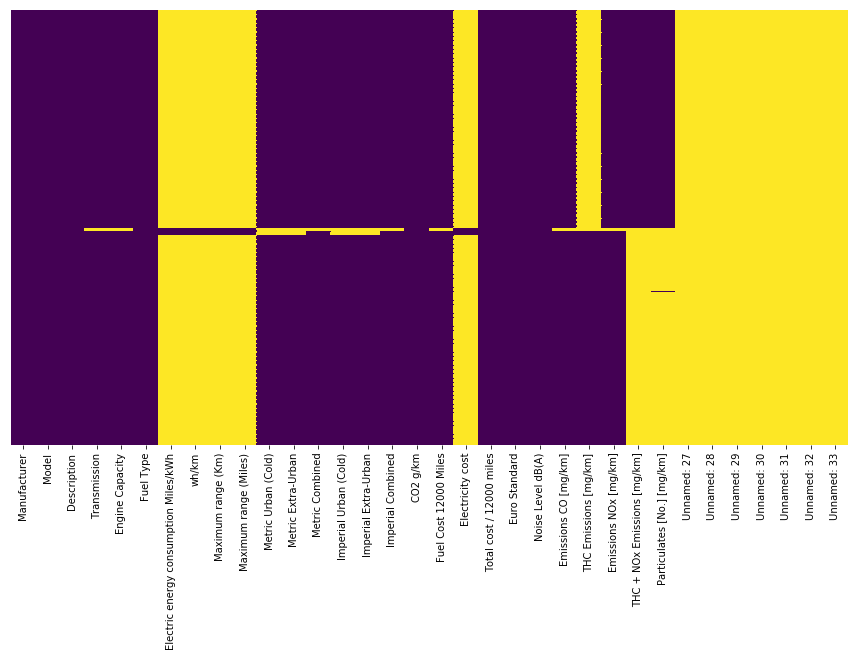

In [628]:
sns.heatmap(cardf.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

There is a lot of missing data. Some columns are completely empty and some of those do not have a proper name. They dont seem be of any use. Hence they can be dropped completely. Other columns like Particulars[No.][mg/km] and Emissions NOx[mg/km] need to be checked and then addressed.

In [629]:
print('No of values available for Electric energy consumption Miles/kWh in the dataset is {}'.format(cardf['Electric energy consumption Miles/kWh'].count()))
print('No of values available for Maximum range (Km) in the dataset is {}'.format(cardf['Maximum range (Km)'].count()))
print('No of values available for Electricity cost in the dataset is {}'.format(cardf['Electricity cost'].count()))

No of values available for Electric energy consumption Miles/kWh in the dataset is 81
No of values available for Maximum range (Km) in the dataset is 81
No of values available for Electricity cost in the dataset is 81


In [630]:
cardf['Electric energy consumption valuecheck'] = np.where(cardf['Electric energy consumption Miles/kWh'].isnull(),1,0)
cardf['Maximum range (Km) valuecheck'] = np.where(cardf['Maximum range (Km)'].isnull(),1,0)
cardf['Electricity cost valuecheck'] = np.where(cardf['Electricity cost'].isnull(),1,0)

In [631]:
cardf[cardf['Electric energy consumption valuecheck'] == 0]

Manufacturer                                    Model  \
2576            BMW             i Series, From November 2013   
2577            BMW             i Series, From November 2013   
2578        CITROEN                                   C-Zero   
2579        HYUNDAI                                    IONIQ   
2580            KIA                                     Soul   
2581         NISSAN                            E-NV200, 2014   
2582         NISSAN                               Leaf, 2016   
2583         NISSAN                               Leaf, 2016   
2584        PEUGEOT                                      iOn   
2585        RENAULT                                Zoe, 2017   
2586        RENAULT                                Zoe, 2017   
2587        RENAULT                                Zoe, 2017   
2588          TESLA                                  Model S   
2589          TESLA                                  Model S   
2590          TESLA                                  Model S   
2591          TESLA                                  Model S   
2592          TESLA                                  Model S   
2593          TESLA                                  Model S   
2594          TESLA                                  Model S   
2595          TESLA                                  Model S   
2596          TESLA                                  Model S   
2597          TESLA                                  Model S   
2598          TESLA                                  Model X   
2599          TESLA                                  Model X   
2600          TESLA                                  Model X   
2601          TESLA                                  Model X   
2602          TESLA                                  Model X   
2603          TESLA                                  Model X   
2604     VOLKSWAGEN                                     Golf   
2605     VOLKSWAGEN                                       UP   
...             ...                                      ...   
2627  MERCEDES-BENZ          C-Class Estate, Model Year 2018   
2628  MERCEDES-BENZ          C-Class Saloon, Model Year 2017   
2629  MERCEDES-BENZ          C-Class Saloon, Model Year 2018   
2630  MERCEDES-BENZ          E-Class Saloon, Model Year 2017   
2631           MINI          Countryman F60, From March 2017   
2632     MITSUBISHI                     Outlander PHEV, 2014   
2633         TOYOTA                    Prius Plug-in, MY2017   
2634     VOLKSWAGEN                            Passat Estate   
2635     VOLKSWAGEN                            Passat Saloon   
2636          VOLVO                                 S90 MY18   
2637          VOLVO                                 V90 MY18   
2638          VOLVO                                XC60 MY18   
2639          VOLVO                                XC90 MY17   
2640          VOLVO                                XC90 MY18   
2641            BMW  7 Series Saloon G12, From November 2016   
2642            BMW  7 Series Saloon G12, From November 2016   
2643  MERCEDES-BENZ          C-Class Estate, Model Year 2017   
2644  MERCEDES-BENZ          C-Class Estate, Model Year 2018   
2645  MERCEDES-BENZ          C-Class Saloon, Model Year 2017   
2646  MERCEDES-BENZ          C-Class Saloon, Model Year 2018   
2647  MERCEDES-BENZ          C-Class Saloon, Model Year 2018   
2648  MERCEDES-BENZ          E-Class Saloon, Model Year 2017   
2649  MERCEDES-BENZ       S-Class Limousine, Model Year 2017   
2650  MERCEDES-BENZ       S-Class Limousine, Model Year 2017   
2651           MINI          Countryman F60, From March 2017   
2652            BMW        X5 Series F15, From November 2013   
2653  MERCEDES-BENZ             GLE Estate, Model Year 2016½   
2654  MERCEDES-BENZ             GLE Estate, Model Year 2016½   
2655  MERCEDES-BENZ              GLE Estate, Model Year 2017   
2656  MERCEDES-BENZ              GLE Estate, Model Year 2017   

                                      

Unfortunately the rows where these three parameters have values tend to have a lot missing values in other related columns. Making the presence of these columns pretty much useless for the analysis. 

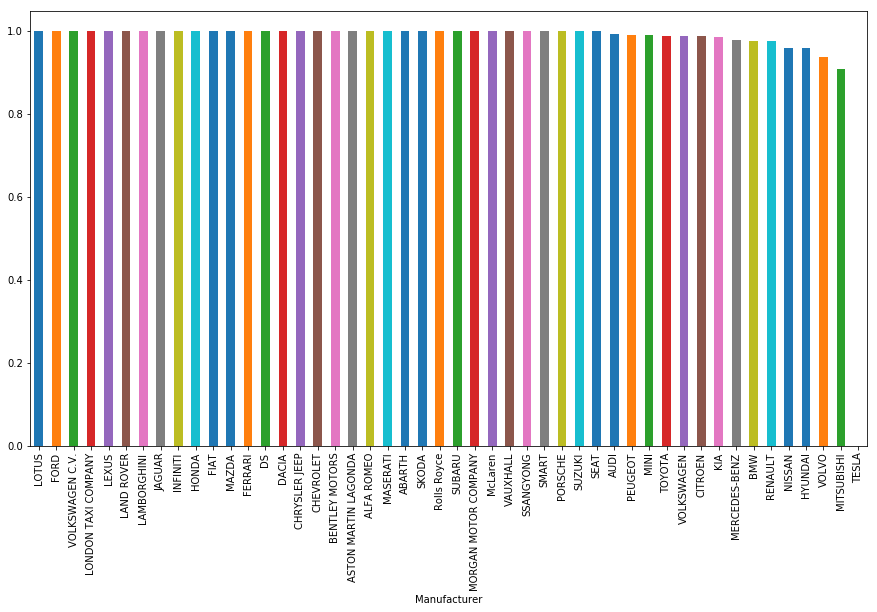

In [632]:
cardf.groupby(['Manufacturer'])['Electric energy consumption valuecheck'].mean().sort_values(ascending=False).plot.bar()

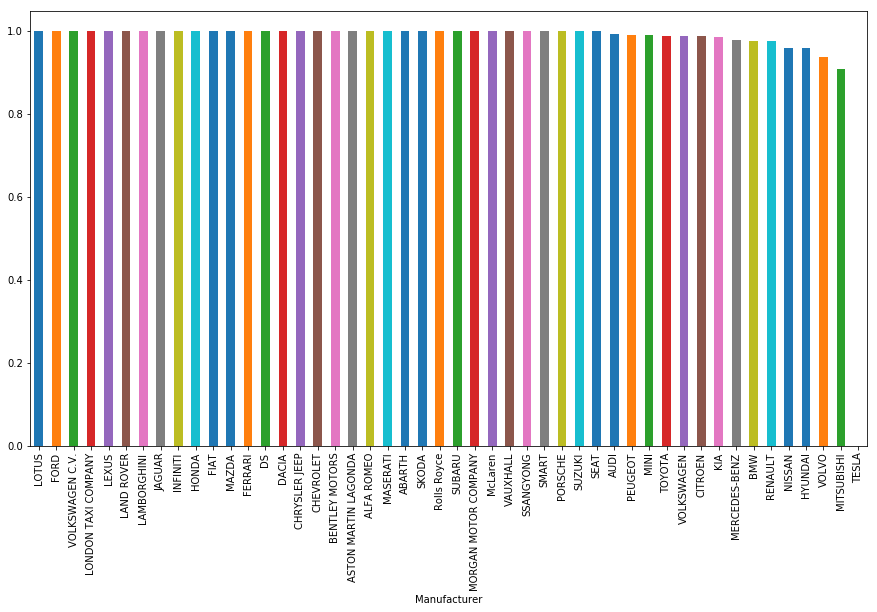

In [633]:
cardf.groupby(['Manufacturer'])['Maximum range (Km) valuecheck'].mean().sort_values(ascending=False).plot.bar()

Tesla seems to be the only player who has all the values for these columns and the rest of the players do not have them. This could be because Tesla is the only company among all the players who have 100% electric vechicles.
Hence the parameters Electric energy consumption Miles/kWh, Maximum range (Km) and Electricity cost will hold huge value for them but all other players who have vehicles in other fuel types will not have these categories. Some players like Hyundai, Volvo, Mitsubishi who have quite a few electric cars do show some data.

Hence these values will be considered Missing Not at Random. They have a specific reason for being missing. 

In [634]:
cardf[cardf['Manufacturer'] == 'TESLA'].shape

(16, 37)

In [635]:
total = cardf.shape[0]
Tesla = cardf[cardf['Manufacturer'] == 'TESLA'].shape[0]
print('Tesla is only {}% of the total data'.format(round((Tesla/total)*100,1)))

Tesla is only 0.3% of the total data


Records about Tesla constitute a very small proportion of the entire data set. As of now we will keep these records. We can replace all of the other rows for these columns with 0 as the value to make them valid. Down the line when we try to model the data for machine learning. We can see if these features need to be removed. 

In [636]:
cols = ['Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33']
cardf.drop(cols,inplace=True,axis=1)

In [637]:
cardf['Electric energy consumption Miles/kWh'].fillna(0,inplace=True)
cardf['Maximum range (Km)'].fillna(0,inplace=True)
cardf['Maximum range (Miles)'].fillna(0,inplace=True)
cardf['Electricity cost'].fillna(0,inplace=True)
cardf['wh/km'].fillna(0,inplace=True)

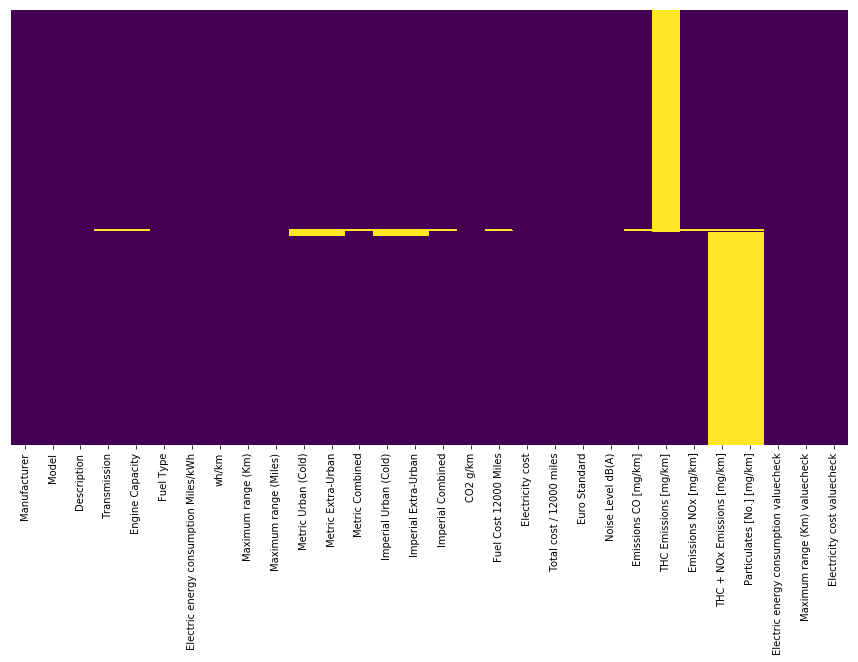

In [638]:
sns.heatmap(cardf.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

Next we look at the columns 'THC + NOx Emissions [mg/km]', 'Particulates [No.] [mg/km]' and 'THC Emissions [mg/km]'. Since these have almost half of the records missing. 
We will try to see if this data is really Missing at Random or is there a reason for these missing as well.

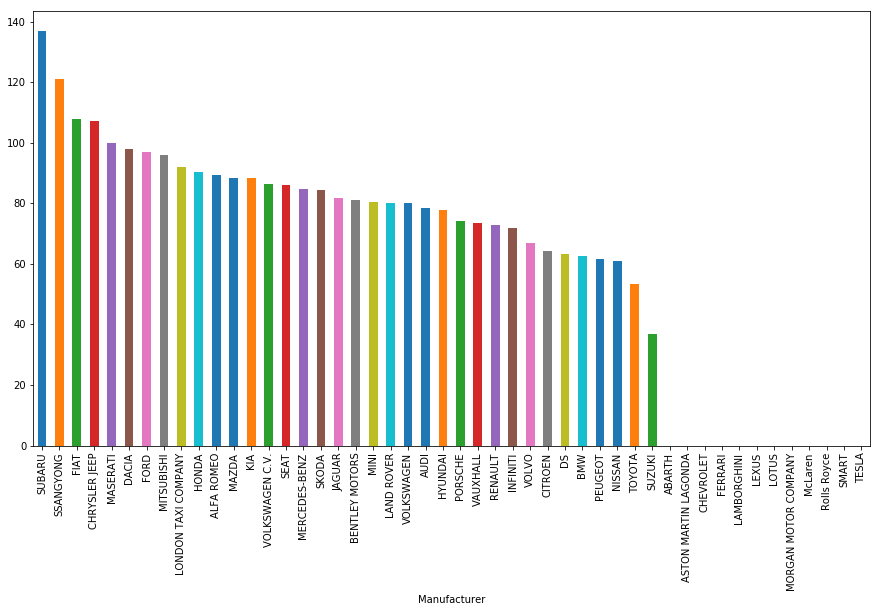

In [639]:
cardf.groupby(['Manufacturer'])['THC + NOx Emissions [mg/km]'].mean().sort_values(ascending=False).plot.bar()

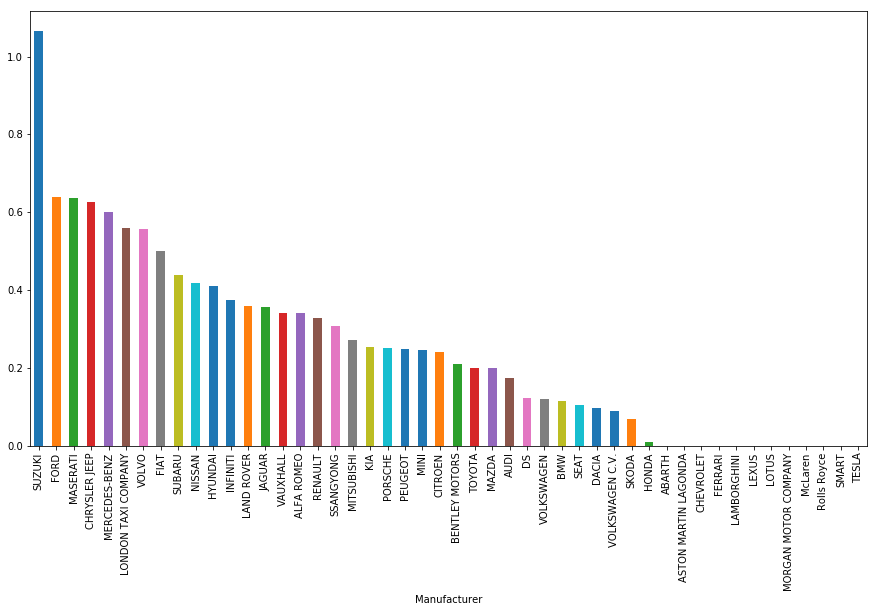

In [640]:
cardf.groupby(['Manufacturer'])['Particulates [No.] [mg/km]'].mean().sort_values(ascending=False).plot.bar()

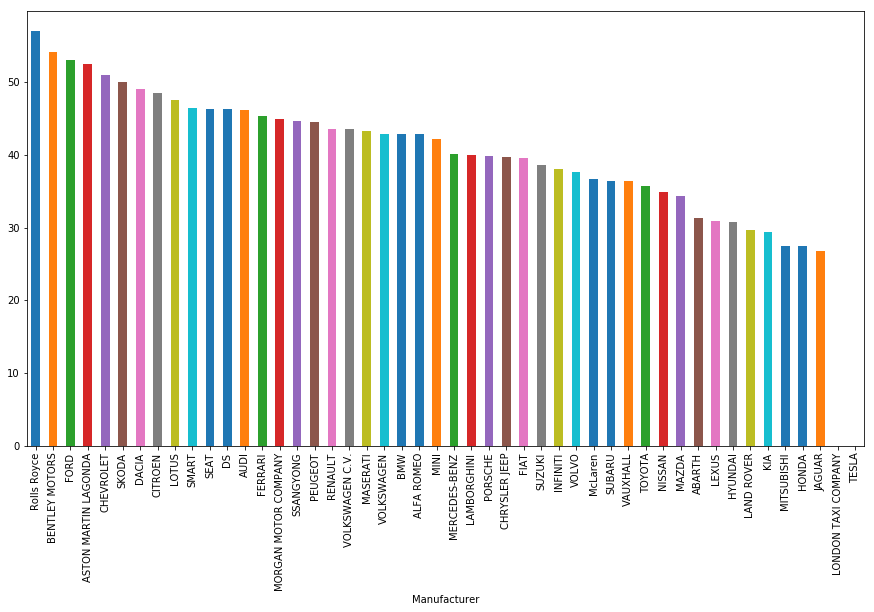

In [641]:
cardf.groupby(['Manufacturer'])['THC Emissions [mg/km]'].mean().sort_values(ascending=False).plot.bar()

The 3 features being looked in here specifies the emission levels for cars. According to the below link, there are set limitations for this in the European Union. 

Link: http://www.unece.org/fileadmin/DAM/trans/doc/2012/wp29grpe/GFV-20-04e.pdf

For example, if we take London Taxi Company which is now known as the LEVC today and they seem to use full Electric taxis. But in this dataset there is only one category called TX4 which seems to have emission levels. This is why we see there is recorded values for THC+NOx and Particulates[No.]. Link: https://en.wikipedia.org/wiki/TX4

The feature Particulates[No.] seems have a lot of missing values for many of the players compared to the other two features in this case. Diesel particulate matter (PM) is not a well defined substance; rather, it is a complex mixture characterized by widely changing chemical composition and physical properties. The main components are elemental carbon (EC), a variety of organic species of different volatility, sulfur compounds and metal oxides. Depending on the temperature, semivolatile species may be in the gas phase or condensed on particles.

The properties of diesel PM depend on the fuel, engine technology, operating conditions, and exhaust aftertreatment. They also change with time, as the particulates undergo transformation once released in the atmosphere or while in the sampling train or in the measurement apparatus. Examples of such transformation include particle coagulation, evaporation and/or condensation of volatile compounds. PM transformation occurring in the sampling/measurement equipment may result in the formation of artifacts, i.e., compounds that are not present in either the undiluted engine exhaust gas or in the atmosphere around diesel vehicles.

Due to this complexity—contrary to the gaseous emissions—a single absolute measure of diesel PM emissions does not exist. Since the very definition of diesel particulate matter is in fact determined by the PM measuring technique that is used, all measures of diesel PM have a somewhat arbitrary character.

The rest of the players in the market seem to report some level of emissions for non electric/fuel based cars. 

This means we can understand that these missing values are not random too. They are missing since those respective models do not have any output got those specific features. Hence we can replace that as well with zero for now and then decide if those features make sense during feature engineering. 

In [642]:
cardf['THC + NOx Emissions [mg/km]'].fillna(0,inplace=True)
cardf['THC Emissions [mg/km]'].fillna(0,inplace=True)
cardf['Particulates [No.] [mg/km]'].fillna(0,inplace=True)

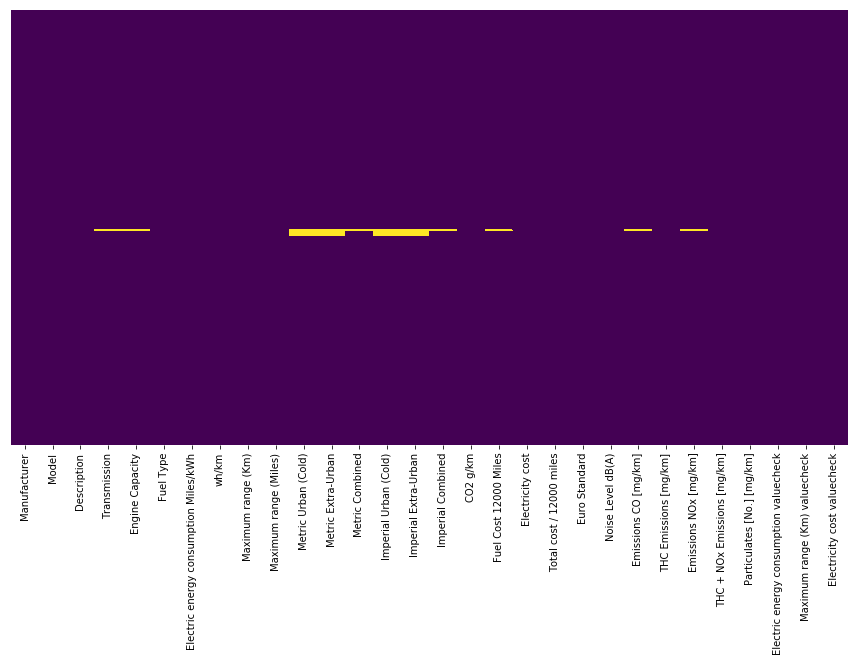

In [643]:
sns.heatmap(cardf.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [644]:
print('No of rows that have missing value now after the initial clean up is: {}'.format(cardf[pd.isnull(cardf).any(axis=1)].shape[0]))
print('Total rows in the given dataset is: {}'.format(cardf.shape[0]))
print('This means {}% of the remaining data has missing values'.format(round((cardf[pd.isnull(cardf).any(axis=1)].shape[0]/cardf.shape[0])*100),2))

No of rows that have missing value now after the initial clean up is: 81
Total rows in the given dataset is: 5118
This means 2% of the remaining data has missing values


In [645]:
missingval = cardf[pd.isnull(cardf).any(axis=1)]

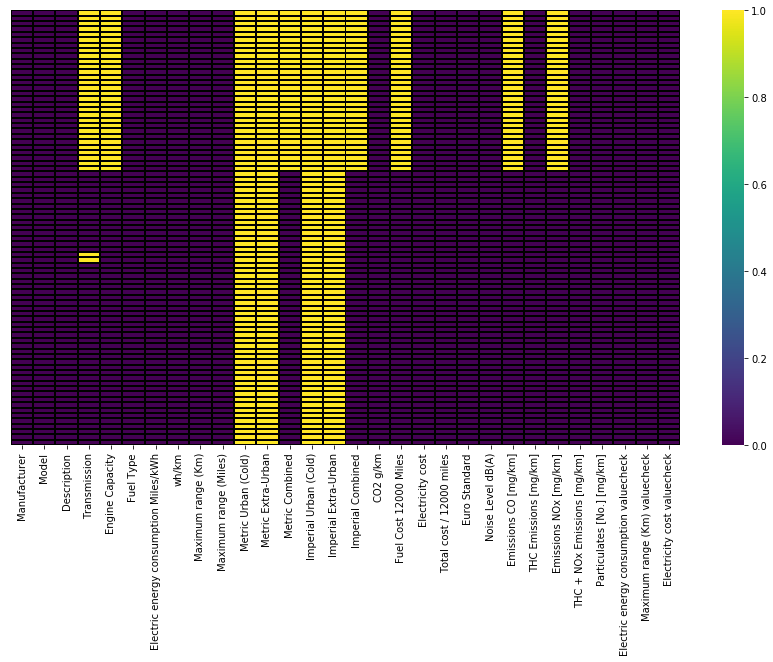

In [646]:
sns.heatmap(missingval.isnull(), linewidths=1 , linecolor='black',yticklabels=False, cbar=True, cmap = 'viridis')

The columns that have missing values are : 'Transmission', 'Engine Capacity','Fuel Cost 12000 Miles','Emissions CO [mg/km]', 'Emissions NOx [mg/km]', 'Metric Combined', 'Metric Urban (Cold)','Metric Extra-Urban','Imperial Urban (Cold)','Imperial Combined' , 'Imperial Extra-Urban'

- Since all of them are models running on electricity, they will not have these values. Hence they are not missing at random either. They will have to be replaced either by zeroes if the value is a float and by respective string types if the value is a string. 

In [648]:
cardf['Transmission'].fillna('Not Applicable',inplace=True)
cardf['Engine Capacity'].fillna(0,inplace=True)
cardf['Fuel Cost 12000 Miles'].fillna('£0',inplace=True)
cardf['Emissions CO [mg/km]'].fillna(0,inplace=True)
cardf['Emissions NOx [mg/km]'].fillna(0,inplace=True)
cardf['Metric Combined'].fillna(0,inplace=True)
cardf['Metric Urban (Cold)'].fillna(0,inplace=True)
cardf['Metric Extra-Urban'].fillna(0,inplace=True)
cardf['Imperial Urban (Cold)'].fillna(0,inplace=True)
cardf['Imperial Combined'].fillna(0,inplace=True)
cardf['Imperial Extra-Urban'].fillna(0,inplace=True)

No data is dropped from the actual dataset. Hence we have the complete set of rows from the original dataset. Which is 5118 rows 


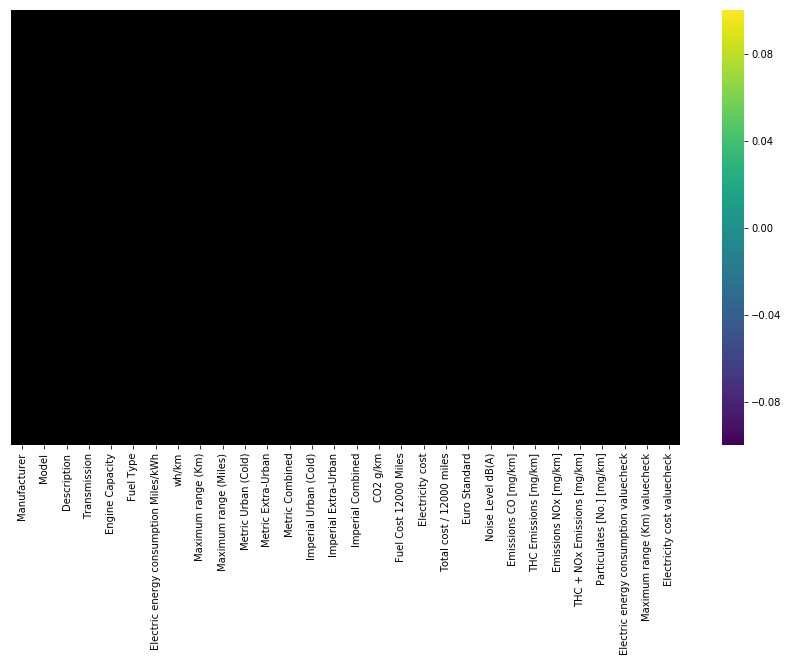

In [649]:
sns.heatmap(cardf.isnull(), linewidths=1 , linecolor='black',yticklabels=False, cbar=True, cmap = 'viridis')
print('No data is dropped from the actual dataset. Hence we have the complete set of rows from the original dataset. Which is {} rows '.format(cardf.shape[0]))

In [650]:
cardf.describe()

Engine Capacity  Electric energy consumption Miles/kWh        wh/km  \
count      5118.000000                            5118.000000  5118.000000   
mean       1975.168425                               0.126651     2.181907   
std         818.418898                               1.807341    18.519735   
min           0.000000                               0.000000     0.000000   
25%        1499.000000                               0.000000     0.000000   
50%        1968.000000                               0.000000     0.000000   
75%        1998.000000                               0.000000     0.000000   
max        6752.000000                              56.500000   269.000000   

       Maximum range (Km)  Maximum range (Miles)  Metric Urban (Cold)  \
count         5118.000000            5118.000000          5118.000000   
mean             2.683861               1.665690             6.795897   
std             31.293152              19.436366             2.870599   
min              0.000000               0.000000             0.000000   
25%              0.000000               0.000000             5.200000   
50%              0.000000               0.000000             6.100000   
75%              0.000000               0.000000             7.700000   
max            632.000000             393.000000            25.600000   

       Metric Extra-Urban  Metric Combined  Imperial Urban (Cold)  \
count         5118.000000      5118.000000            5118.000000   
mean             4.729523         5.512427              44.644295   
std              1.345608         1.821173              13.959945   
min              0.000000         0.000000               0.000000   
25%              4.000000         4.400000              36.200000   
50%              4.500000         5.100000              45.600000   
75%              5.200000         6.100000              54.300000   
max             12.100000        17.000000              97.400000   

       Imperial Extra-Urban  Imperial Combined     CO2 g/km  Euro Standard  \
count           5118.000000        5118.000000  5118.000000         5118.0   
mean              60.711020          54.926827   134.633841            6.0   
std               14.693718          17.895868    40.377900            0.0   
min                0.000000           0.000000     0.000000            6.0   
25%               53.300000          46.300000   112.000000            6.0   
50%               61.400000          54.300000   127.000000            6.0   
75%               70.600000          64.200000   148.000000            6.0   
max              104.600000         470.800000   395.000000            6.0   

       Noise Level dB(A)  Emissions CO [mg/km]  THC Emissions [mg/km]  \
count        5118.000000           5118.000000            5118.000000   
mean           71.100547            259.482610              20.424580   
std             2.047774            142.110531              22.628377   
min            63.000000              0.000000               0.000000   
25%            70.000000            158.000000               0.000000   
50%            71.000000            226.000000               0.000000   
75%            73.000000            334.000000              41.000000   
max            76.000000            935.000000              79.000000   

       Emissions NOx [mg/km]  THC + NOx Emissions [mg/km]  \
count            5118.000000                  5118.000000   
mean               36.982806                    40.022274   
std                21.192311                    42.670068   
min                 0.000000                     0.000000   
25%                22.000000                     0.000000   
50%                35.000000                    27.000000   
75%                51.000000                    79.000000   
max               726.000000                   154.000000   

       Particulates [No.] [mg/km]  Electric energy consumption valuecheck  \
count                 5118.000000   

#### Data Visualization

We shall do some graphical representation of the data to build some visual meaning out of the features. Understand how different car manufacturers and models perform. Example, we can study the different emission levels of each car maker and how stands where based on different feature parameters. 

Down the line we will end up normalizing the data a lot and it will be hard to see how the data pattern looked like. 

###### Since THC(Total Hydro Carbon) emissions are more important to look at as they tend to cause maximum damage to air quality over time. We will plot some graphs against the below columns
THC Emissions, Emissions NOx,THC + NOx Emissions, Particulates

Note: Emission CO - (Carbon di oxide) emission isnt considered as harmful as the hydrocarbons. Hence we look at only THC.

In [519]:
trace = go.Scatter(
    x = cardf['Particulates [No.] [mg/km]'].values,
    y = cardf['Engine Capacity'].values,
    mode='markers',
    marker=dict(
        size = cardf['Noise Level dB(A)'].values,
        color = cardf['Particulates [No.] [mg/km]'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = cardf['Manufacturer'].values
)

data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Particulates [No.] [mg/km] distributed by Engine Capacity with bubble sized on Noise Level dB(A)',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Engine Capacity',
        ticklen= 5,
        gridwidth= 2,
    ),
    xaxis=dict(
        title= 'Particulates [No.] [mg/km]',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter_emission')

In [520]:
trace = go.Scatter(
    x = cardf['THC + NOx Emissions [mg/km]'].values,
    y = cardf['Engine Capacity'].values,
    mode='markers',
    marker=dict(
        size = cardf['Noise Level dB(A)'].values,
        color = cardf['THC + NOx Emissions [mg/km]'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = cardf['Manufacturer'].values
)

data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'THC + NOx Emissions [mg/km] distributed by Engine Capacity with bubble sized on Noise Level dB(A)',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Engine Capacity',
        ticklen= 5,
        gridwidth= 2,
    ),
    xaxis=dict(
        title= 'THC + NOx Emissions [mg/km]',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter_emission')

In [521]:
trace = go.Scatter(
    x = cardf['Emissions NOx [mg/km]'].values,
    y = cardf['Engine Capacity'].values,
    mode='markers',
    marker=dict(
        size = cardf['Noise Level dB(A)'].values,
        color = cardf['Emissions NOx [mg/km]'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = cardf['Manufacturer'].values
)

data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Emission of NOx [mg/km] distributed by Engine Capacity with bubble sized on Noise Level dB(A)',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Engine Capacity',
        ticklen= 5,
        gridwidth= 2,
    ),
    xaxis=dict(
        title= 'Emissions NOx [mg/km]',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter_emission')

In [522]:
cardf['Total cost /12000 miles as numeric'] = cardf['Total cost / 12000 miles'].replace('[\£,]', '', regex=True).astype(float)
cardf['Fuel Cost 12000 Miles as numeric'] = cardf['Fuel Cost 12000 Miles'].replace('[\£,]','', regex=True).astype(float)

trace = go.Scatter(
    x = cardf['Engine Capacity'].values,
    y = cardf['Fuel Type'].values,
    mode='markers',
    marker=dict(
        #size = cardf['Fuel Cost 12000 Miles as numeric'].values,
        color = cardf['Total cost /12000 miles as numeric'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = cardf['Manufacturer'].values
)

data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Engine Capacity Distributed by Fuel Type based on Fuel Cost per 12000 Miles',
    hovermode= 'closest',
    xaxis=dict(
        title= 'Engine Capacity of different car models',
        ticklen= 5,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Fuel Type',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter_fueltype')

In [523]:
labels = cardf['Manufacturer'].values
values = list(cardf['Manufacturer'].value_counts())
trace = go.Pie(labels=labels, values=values)
data = [trace]
layout = go.Layout(title='Manufacturers distribution by count')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart')

In [524]:
labels = cardf['Manufacturer'].values
values = list(cardf['Model'].value_counts())
trace = go.Pie(labels=labels, values=values)
data = [trace]
layout = go.Layout(title='Manufacturers distributed by the most number of Car models')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart')

In [525]:
xaxis = cardf.sort_values(['Manufacturer'])['Manufacturer'].unique()
yaxis = list(cardf.groupby('Manufacturer')['Fuel Cost 12000 Miles as numeric'].sum())
trace0 = go.Bar(
    x=xaxis,
    y=yaxis,
    marker=dict(
        color='rgb(45,255,225)',
        line=dict(
            color='rgb(102,56,163)',
            width=1.5,
        )
    ),
    opacity=0.7
)

data = [trace0]
layout = go.Layout(
    title='Fuel Cost per 12k Miles for each Manufacturer',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [526]:
xaxis = cardf.sort_values(['Manufacturer'])['Manufacturer'].unique()
yaxis = list(cardf.groupby('Manufacturer')['Electric energy consumption Miles/kWh'].sum())
trace0 = go.Bar(
    x=xaxis,
    y=yaxis,
    marker=dict(
        color='rgb(200,4,25)',
        line=dict(
            color='rgb(302,255,133)',
            width=1.5,
        )
    ),
    opacity=0.7
)

data = [trace0]
layout = go.Layout(
    title='Electric energy consumption Miles/kWh for each Manufacturer',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [527]:
cardf.drop('Total cost /12000 miles as numeric',inplace=True,axis=1)
cardf.drop('Fuel Cost 12000 Miles as numeric',inplace=True,axis=1)

#### Modelling

We need to identify the columns that are non numeric and remove them to make a box plot and see how the outliers look on the numeric colums. The following few line of codes does that

In [528]:
[key for key in dict(cardf.dtypes) if dict(cardf.dtypes)[key] in ['object']]

['Manufacturer',
 'Model',
 'Description',
 'Transmission',
 'Fuel Type',
 'Fuel Cost 12000 Miles',
 'Electricity cost',
 'Total cost / 12000 miles']

In [529]:
[key for key in dict(cardf.dtypes) if dict(cardf.dtypes)[key] in ['float64','int64','int32']]

['Engine Capacity',
 'Electric energy consumption Miles/kWh',
 'wh/km',
 'Maximum range (Km)',
 'Maximum range (Miles)',
 'Metric Urban (Cold)',
 'Metric Extra-Urban',
 'Metric Combined',
 'Imperial Urban (Cold)',
 'Imperial Extra-Urban',
 'Imperial Combined',
 'CO2 g/km',
 'Euro Standard',
 'Noise Level dB(A)',
 'Emissions CO [mg/km]',
 'THC Emissions [mg/km]',
 'Emissions NOx [mg/km]',
 'THC + NOx Emissions [mg/km]',
 'Particulates [No.] [mg/km]',
 'Electric energy consumption valuecheck',
 'Maximum range (Km) valuecheck',
 'Electricity cost valuecheck']

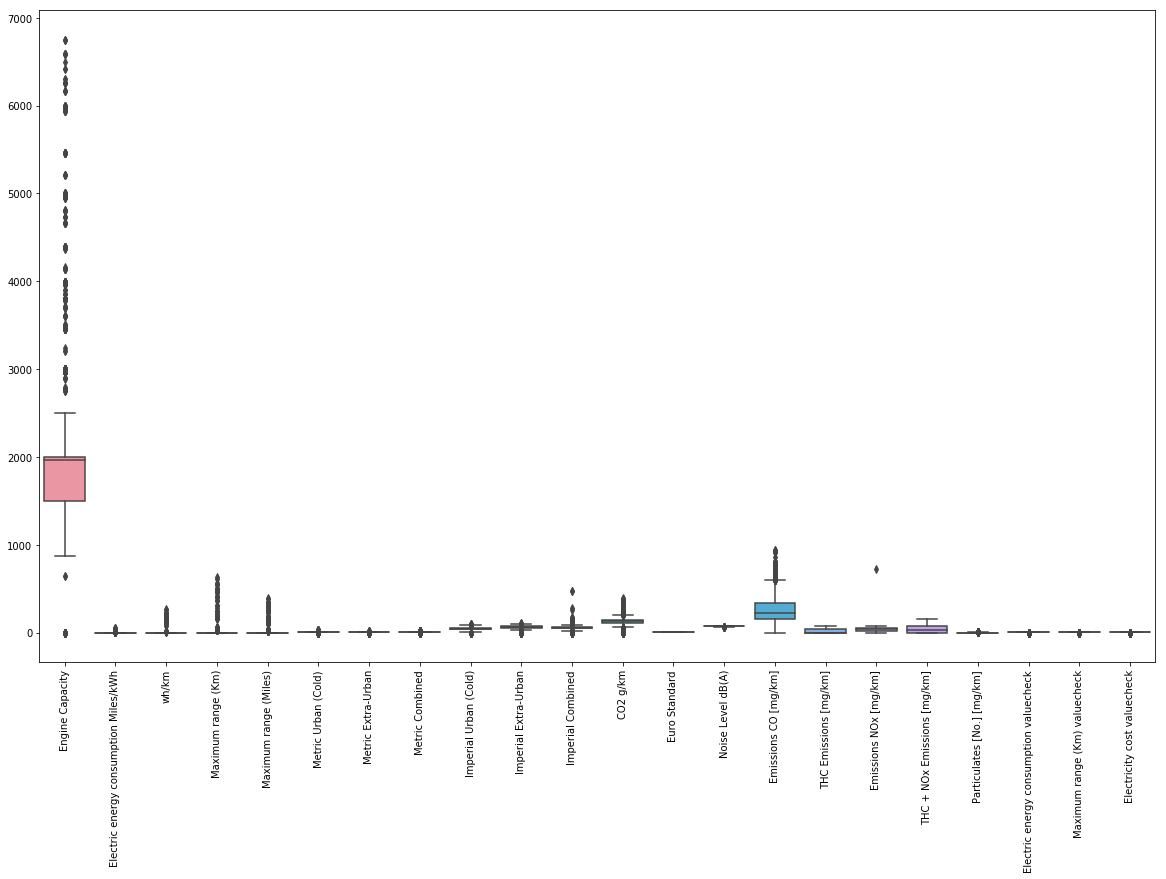

In [651]:
cardf_box = cardf.drop(['Manufacturer',  'Model',  'Description', 'Transmission', 'Fuel Type', 'Fuel Cost 12000 Miles', 'Electricity cost','Total cost / 12000 miles'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=cardf_box,orient='v')
ax.set_xticklabels(['Engine Capacity', 'Electric energy consumption Miles/kWh', 'wh/km', 'Maximum range (Km)', 'Maximum range (Miles)', 'Metric Urban (Cold)', 'Metric Extra-Urban', 'Metric Combined', 'Imperial Urban (Cold)', 'Imperial Extra-Urban', 'Imperial Combined', 'CO2 g/km', 'Euro Standard', 'Noise Level dB(A)', 'Emissions CO [mg/km]', 'THC Emissions [mg/km]', 'Emissions NOx [mg/km]', 'THC + NOx Emissions [mg/km]', 'Particulates [No.] [mg/km]', 'Electric energy consumption valuecheck','Maximum range (Km) valuecheck', 'Electricity cost valuecheck'],rotation=90)
plt.show()

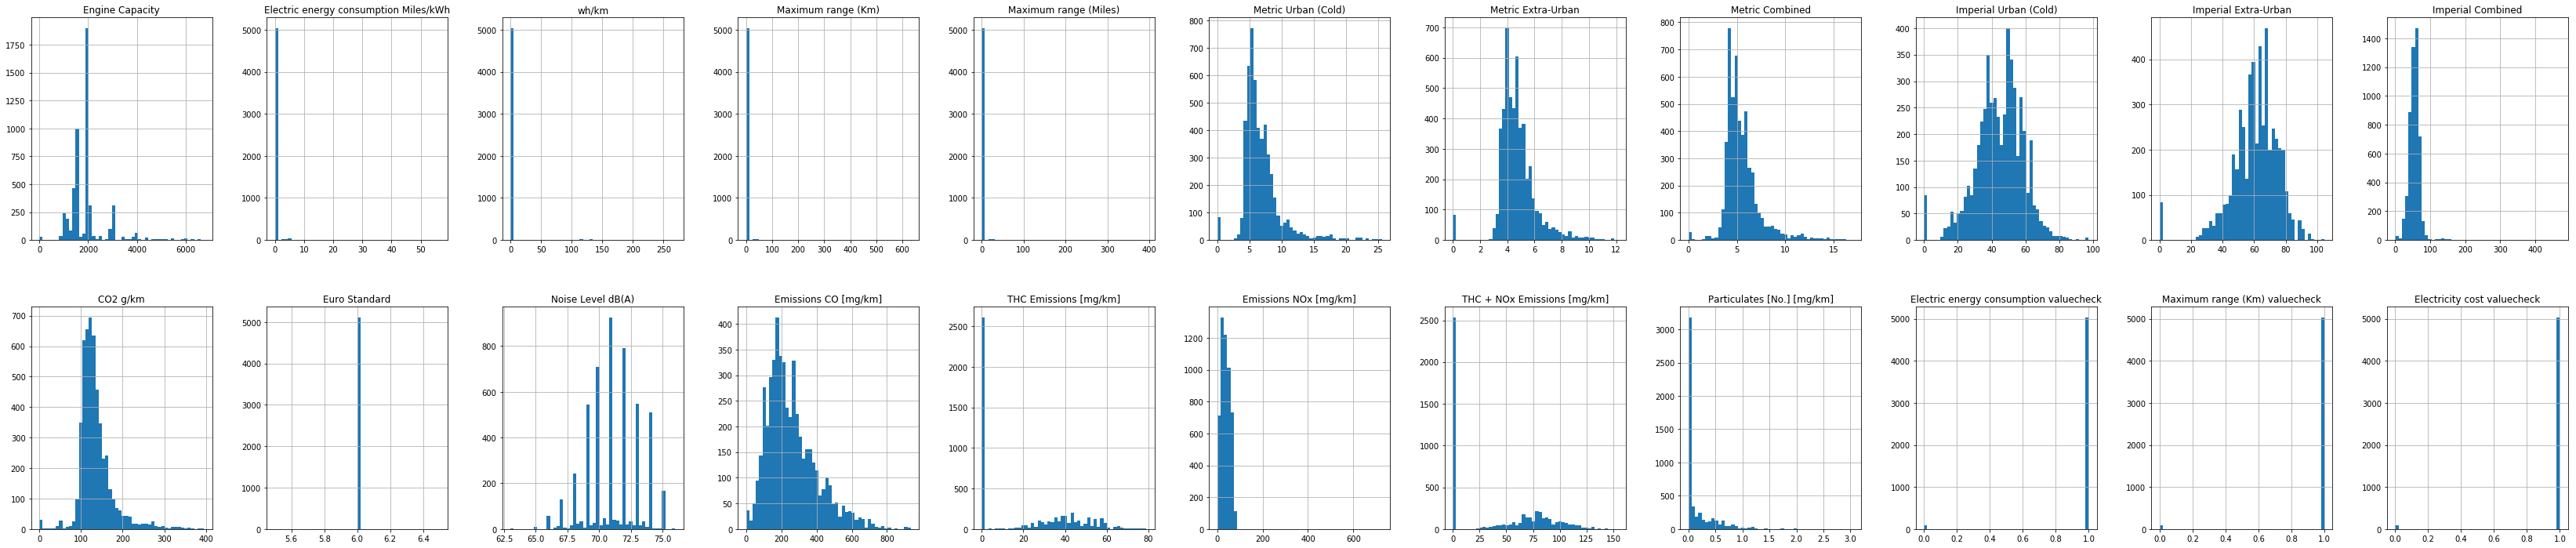

In [652]:
fig, axes = plt.subplots(len([key for key in dict(cardf.dtypes) if dict(cardf.dtypes)[key] in ['float64','int64','int32']])//11, 11, figsize=(58, 12))
num_cols = [key for key in dict(cardf.dtypes) if dict(cardf.dtypes)[key] in ['float64','int64','int32']]
i = 0
for triaxis in axes:
    for axis in triaxis:
        cardf.hist(column = num_cols[i], bins = 50, ax=axis)
        i = i+1

A huge number of zeroes that were replaced in the dataset have caused some impact on some of the variables like : 

###### 'Electric energy consumption Miles/kWh', 'wh/km', 'Maximum range (Km)', 'Maximum range (Miles)'

==================================================================================================================

The features that seem to have lot of zeroes since many cars donot have them as an applicable category :

###### 'Metric Urban (Cold)', 'Metric Extra-Urban', 'THC Emissions [mg/km]','Emissions NOx [mg/km]', 'THC + NOx Emissions [mg/km]','Particulates [No.] [mg/km]'

==================================================================================================================

 These columns need to be dropped :

###### 'Electric energy consumption valuecheck', 'Maximum range (Km) valuecheck', 'Electricity cost valuecheck'

==================================================================================================================

These columns are fairly normal in distribution or some are lesser skewed compared to the ones above, any outliers seen are not outliers as such since they dont seem to be recording mistakes rather they are real values for the respective feature of the car and they seem to stick with the facts: 

###### 'Engine Capacity',  'Metric Combined', 'Imperial Urban (Cold)', 'Imperial Extra-Urban','Imperial Combined','CO2 g/km','Euro Standard','Noise Level dB(A)','Emissions CO [mg/km]', - 

In [653]:
tobedropped = ['Electric energy consumption valuecheck', 'Maximum range (Km) valuecheck', 'Electricity cost valuecheck']
cardf.drop(tobedropped,axis=1,inplace=True)

Though they seem like outliers on the graph. They shouldnt be so in real life. The values of engine capacity does vary a lot of the range of cars in the given dataset and some of the cars way more powerful hence will have larger engine capacities. 

We can have two copies of the dataset where one will have all the outliers normalized and other one without normalizing. Then we can model both data and see how they work.

In [654]:
obj_cardf = cardf.select_dtypes(include=['object']).copy()
obj_cardf.head()

Manufacturer                                     Model  \
0   ALFA ROMEO     MiTo Series 3, September 2016 Onwards   
1          BMW  1 Series 3-door F21, From September 2012   
2          BMW  1 Series 5-door F20, From September 2011   
3      CITROEN                                        C4   
4      CITROEN                                 C4 Cactus   

               Description Transmission Fuel Type Fuel Cost 12000 Miles  \
0        1.3 JTDm-2 95 bhp           M5    Diesel                  £807   
1  116d ED Plus 16'' tyres           M6    Diesel                  £807   
2  116d ED Plus 16'' tyres           M6    Diesel                  £807   
3          BlueHDi 100 S&S           M5    Diesel                  £784   
4     BlueHDi 100 S&S ETG6         AMT6    Diesel                  £807   

  Electricity cost Total cost / 12000 miles  
0                0                     £807  
1                0                     £807  
2                0                     £807  
3                0                     £784  
4                0                     £807

In [655]:
print("No of unique values in the Manufacturer feature are: {}".format(obj_cardf['Manufacturer'].nunique()))
print("No of unique values in the Model feature are: {}".format(obj_cardf['Model'].nunique()))
print("No of unique values in the Description feature are: {}".format(obj_cardf['Description'].nunique()))
print("No of unique values in the Transmission feature are: {}".format(obj_cardf['Transmission'].nunique()))
print("No of unique values in the Fuel Type feature are: {}".format(obj_cardf['Fuel Type'].nunique()))
print("No of unique values in the Fuel Cost 12000 Miles feature are: {}".format(obj_cardf['Fuel Cost 12000 Miles'].nunique()))
print("No of unique values in the Electricity Cost feature are: {}".format(obj_cardf['Electricity cost'].nunique()))
print("No of unique values in the Total Cost / 12000 Miles feature are: {}".format(obj_cardf['Total cost / 12000 miles'].nunique()))

No of unique values in the Manufacturer feature are: 48
No of unique values in the Model feature are: 541
No of unique values in the Description feature are: 3026
No of unique values in the Transmission feature are: 49
No of unique values in the Fuel Type feature are: 8
No of unique values in the Fuel Cost 12000 Miles feature are: 238
No of unique values in the Electricity Cost feature are: 29
No of unique values in the Total Cost / 12000 Miles feature are: 268


Description isnt really necessary when it comes to modelling. Hence we could drop that column. 
The Model column also wouldnt contribute much to the model building processing. Hence that could also be dropped
The Fuel cost and Total cost are actually numericals, though they have huge unique values we could take away the currency symbol and convert them to numbers

In [656]:
cardf['Total cost / 12000 miles'] = cardf['Total cost / 12000 miles'].replace('[\£,]', '', regex=True).astype(float)
cardf['Fuel Cost 12000 Miles'] = cardf['Fuel Cost 12000 Miles'].replace('[\£,]', '', regex=True).astype(float)
cardf['Electricity cost'] = cardf['Electricity cost'].replace('[\£,]', '', regex=True).astype(float)

In [657]:
cardf.drop(labels=['Description','Model','Euro Standard'],inplace=True,axis=1)

In [658]:
cardf.rename(columns = {'Engine Capacity':'Engine_Capacity','Electric energy consumption Miles/kWh':'Electric_energy_consumption_Miles_kWh','wh/km':'wh_km','Maximum range (Km)':'Maximum_range_(Km)','Maximum range (Miles)':'Maximum_range_Miles','Metric Urban (Cold)':'Metric_Urban_Cold','Metric Extra-Urban':'Metric_Extra_Urban','Metric Combined':'Metric_Combined','Imperial Urban (Cold)':'Imperial_Urban_Cold','Imperial Extra-Urban':'Imperial_Extra_Urban','Imperial Combined':'Imperial_Combined','CO2 g/km':'CO2_g_km','Euro Standard':'Euro_Standard','Noise Level dB(A)':'Noise_Level_dBA','Emissions CO [mg/km]':'Emissions_CO_mg_km','THC Emissions [mg/km]':'THC_Emissions_mg_km','Emissions NOx [mg/km]':'Emissions_NOx_mg_km','THC + NOx Emissions [mg/km]':'THC_NOx_Emissions_mg_km','Particulates [No.] [mg/km]':'Particulates_No_mg_km'}, inplace = True)

In [659]:
cardf_notnormalized = cardf.copy()

In [660]:
def normalization(df,colnames):
    for colname in colnames:
        colname = str(colname)
        df.loc[df[colname] > df[colname].quantile(q=0.86), colname] = df[colname].quantile(q=0.86)
        df.loc[df[colname] < df[colname].quantile(q=0.01), colname] = df[colname].quantile(q=0.01)
        
    return df

In [661]:
cardf_normalized = normalization(cardf, ['Engine_Capacity', 'Electric_energy_consumption_Miles_kWh', 'wh_km', 'Maximum_range_(Km)', 'Maximum_range_Miles', 'Metric_Urban_Cold',  'Metric_Extra_Urban',   'Metric_Combined',  'Imperial_Urban_Cold',  'Imperial_Extra_Urban',  'Imperial_Combined', 'CO2_g_km',  'Fuel Cost 12000 Miles',  'Electricity cost',  'Total cost / 12000 miles',  'Noise_Level_dBA',  'Emissions_CO_mg_km',  'THC_Emissions_mg_km',  'Emissions_NOx_mg_km',  'THC_NOx_Emissions_mg_km',  'Particulates_No_mg_km'])

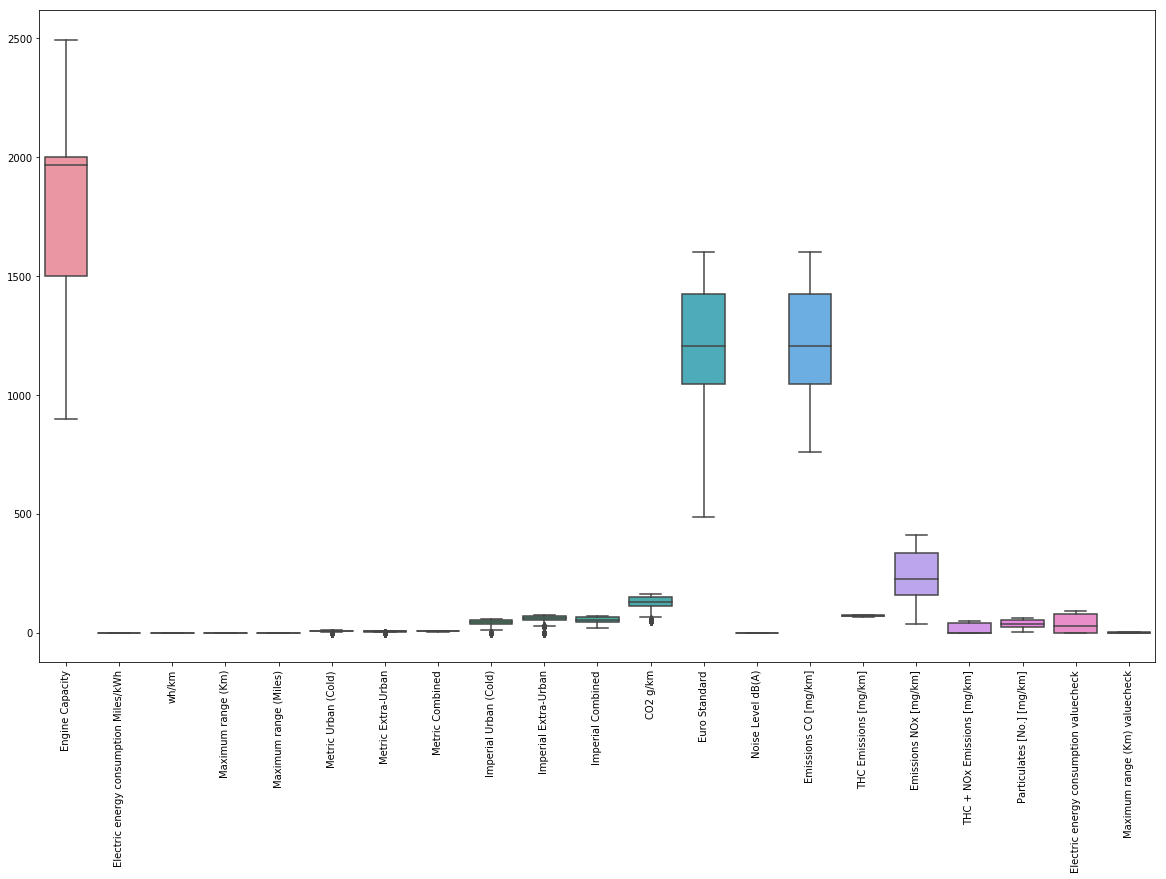

In [662]:
cardf_box = cardf_normalized.drop(['Manufacturer', 'Transmission', 'Fuel Type'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=cardf_box,orient='v')
ax.set_xticklabels(['Engine Capacity', 'Electric energy consumption Miles/kWh', 'wh/km', 'Maximum range (Km)', 'Maximum range (Miles)', 'Metric Urban (Cold)', 'Metric Extra-Urban', 'Metric Combined', 'Imperial Urban (Cold)', 'Imperial Extra-Urban', 'Imperial Combined', 'CO2 g/km', 'Euro Standard', 'Noise Level dB(A)', 'Emissions CO [mg/km]', 'THC Emissions [mg/km]', 'Emissions NOx [mg/km]', 'THC + NOx Emissions [mg/km]', 'Particulates [No.] [mg/km]', 'Electric energy consumption valuecheck','Maximum range (Km) valuecheck', 'Electricity cost valuecheck'],rotation=90)
plt.show()

In [663]:
corr1 = cardf_normalized.corr()
corr2 = cardf_notnormalized.corr()

Text(0.5,1,'Normalized Car Emission Data')

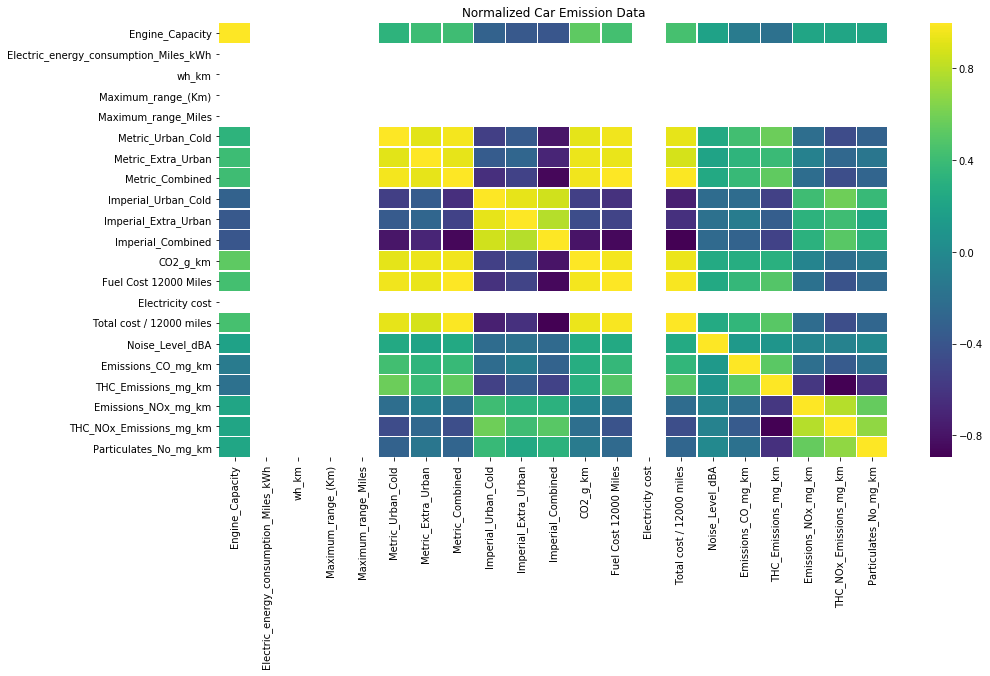

In [664]:
sns.heatmap(corr1, linewidths=.5, cmap='viridis').set_title('Normalized Car Emission Data')

Text(0.5,1,'NotNormalized Car Emission Data')

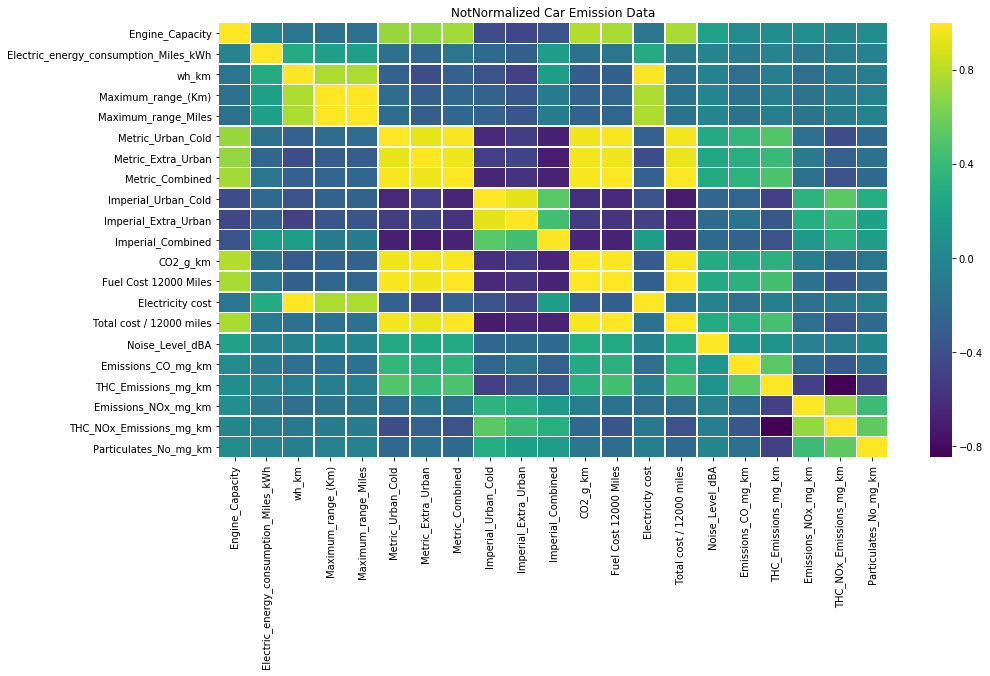

In [665]:
sns.heatmap(corr2, linewidths=.5, cmap='viridis').set_title('NotNormalized Car Emission Data')

In [666]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        df = x.drop(col, axis=1)

    return df

In [667]:
cardf_normalized_corr = corr_df(cardf_normalized,0.6)

Metric_Combined | Metric_Urban_Cold | 0.97
Imperial_Combined | Imperial_Urban_Cold | 0.86
CO2_g_km | Metric_Urban_Cold | 0.92
CO2_g_km | Metric_Extra_Urban | 0.95
CO2_g_km | Metric_Combined | 0.96
Fuel Cost 12000 Miles | Metric_Urban_Cold | 0.96
Fuel Cost 12000 Miles | Metric_Extra_Urban | 0.94
Fuel Cost 12000 Miles | Metric_Combined | 1.0
Total cost / 12000 miles | Metric_Urban_Cold | 0.93
Total cost / 12000 miles | Metric_Extra_Urban | 0.88
Total cost / 12000 miles | Metric_Combined | 0.99
Total cost / 12000 miles | CO2_g_km | 0.94
Total cost / 12000 miles | Fuel Cost 12000 Miles | 0.99


In [668]:
cardf_notnormalized_corr = corr_df(cardf_notnormalized,0.6)

Maximum_range_Miles | wh_km | 0.77
Metric_Urban_Cold | Engine_Capacity | 0.72
Metric_Extra_Urban | Engine_Capacity | 0.7
Metric_Combined | Engine_Capacity | 0.75
Metric_Combined | Metric_Urban_Cold | 0.98
CO2_g_km | Engine_Capacity | 0.79
CO2_g_km | Metric_Urban_Cold | 0.96
CO2_g_km | Metric_Extra_Urban | 0.97
CO2_g_km | Metric_Combined | 0.98
Fuel Cost 12000 Miles | Engine_Capacity | 0.75
Fuel Cost 12000 Miles | Metric_Urban_Cold | 0.98
Fuel Cost 12000 Miles | Metric_Extra_Urban | 0.96
Fuel Cost 12000 Miles | Metric_Combined | 1.0
Electricity cost | wh_km | 1.0
Electricity cost | Maximum_range_(Km) | 0.77
Electricity cost | Maximum_range_Miles | 0.77
Total cost / 12000 miles | Engine_Capacity | 0.76
Total cost / 12000 miles | Metric_Urban_Cold | 0.97
Total cost / 12000 miles | Metric_Extra_Urban | 0.94
Total cost / 12000 miles | Metric_Combined | 0.99
Total cost / 12000 miles | CO2_g_km | 0.97
Total cost / 12000 miles | Fuel Cost 12000 Miles | 0.99


In [669]:
cardf_normalized['CO2_mg_km'] = cardf_normalized.apply(lambda x: x['CO2_g_km']*1000, axis=1)
cardf_normalized.drop('CO2_g_km',axis=1,inplace=True)
cardf_normalized['CO2_mg_km'] = cardf_normalized['CO2_mg_km'].astype('float64')

In [670]:
cardf_notnormalized['CO2_mg_km'] = cardf_notnormalized.apply(lambda x: x['CO2_g_km']*1000, axis=1)
cardf_notnormalized.drop('CO2_g_km',axis=1,inplace=True)
cardf_notnormalized['CO2_mg_km'] = cardf_notnormalized['CO2_mg_km'].astype('float64')

In [671]:
cardf_normalized['Total_Emission[CO2+CO+NOx+THCNOx+ParticulatesNo]_mg/km'] = cardf_normalized.apply(lambda x: x['CO2_mg_km'] + x['Emissions_CO_mg_km'] + x['THC_Emissions_mg_km'] + x['Emissions_NOx_mg_km'] + x['THC_NOx_Emissions_mg_km'] + x['Particulates_No_mg_km'], axis=1)
cardf_notnormalized['Total_Emission[CO2+CO+NOx+THCNOx+ParticulatesNo]_mg/km'] = cardf_normalized.apply(lambda x: x['CO2_mg_km'] + x['Emissions_CO_mg_km'] + x['THC_Emissions_mg_km'] + x['Emissions_NOx_mg_km'] + x['THC_NOx_Emissions_mg_km'] + x['Particulates_No_mg_km'], axis=1)

In [672]:
cardf_normalized.head()

Manufacturer Transmission  Engine_Capacity Fuel Type  \
0   ALFA ROMEO           M5           1248.0    Diesel   
1          BMW           M6           1496.0    Diesel   
2          BMW           M6           1496.0    Diesel   
3      CITROEN           M5           1560.0    Diesel   
4      CITROEN         AMT6           1560.0    Diesel   

   Electric_energy_consumption_Miles_kWh  wh_km  Maximum_range_(Km)  \
0                                    0.0    0.0                 0.0   
1                                    0.0    0.0                 0.0   
2                                    0.0    0.0                 0.0   
3                                    0.0    0.0                 0.0   
4                                    0.0    0.0                 0.0   

   Maximum_range_Miles  Metric_Urban_Cold  Metric_Extra_Urban  \
0                  0.0                4.3                 2.9   
1                  0.0                3.9                 3.1   
2                  0.0                3.9                 3.1   
3                  0.0                3.7                 3.1   
4                  0.0                3.9                 3.2   

   Metric_Combined  Imperial_Urban_Cold  Imperial_Extra_Urban  \
0              3.4                 58.9                  74.3   
1              3.4                 58.9                  74.3   
2              3.4                 58.9                  74.3   
3              3.3                 58.9                  74.3   
4              3.4                 58.9                  74.3   

   Imperial_Combined  Fuel Cost 12000 Miles  Electricity cost  \
0               68.9                  807.0               0.0   
1               68.9                  807.0               0.0   
2               68.9                  807.0               0.0   
3               68.9                  784.0               0.0   
4               68.9                  807.0               0.0   

   Total cost / 12000 miles  Noise_Level_dBA  Emissions_CO_mg_km  \
0                     807.0             67.5               234.0   
1                     807.0             68.0               119.0   
2                     807.0             68.0               119.0   
3                     784.0             68.8               272.0   
4                     807.0             69.2               185.0   

   THC_Emissions_mg_km  Emissions_NOx_mg_km  THC_NOx_Emissions_mg_km  \
0                  0.0                 61.0                     91.0   
1                  0.0                 37.0                     66.0   
2                  0.0                 37.0                     66.0   
3                  0.0                 55.0                     74.0   
4                  0.0                 40.0                     53.0   

   Particulates_No_mg_km  CO2_mg_km  \
0                   0.27    89000.0   
1                   0.14    89000.0   
2                   0.14    89000.0   
3                   0.42    86000.0   
4                   0.03    89000.0   

   Total_Emission[CO2+CO+NOx+THCNOx+ParticulatesNo]_mg/km  
0                                           89386.27       
1                                           89222.14       
2                                           89222.14       
3                                           86401.42       
4                                           89278.03

Now that we know that we have summed up all the emission values that are in a standard mg/km into one single value called total emission. We could reduce the name to just total emission for simplicity and ensure we remember that it means it is the sum of all the popultant emission categories in this dataset. 

We will drop all the individual columns that we summed up and just keep the total value.

Using sklearn we will predict how much emission could a car cause based on rest of the variables in the dataset.


In [673]:
cardf_normalized.drop(['Emissions_CO_mg_km', 'THC_Emissions_mg_km', 'Emissions_NOx_mg_km', 'THC_NOx_Emissions_mg_km', 'Particulates_No_mg_km'],axis=1,inplace=True)
cardf_normalized.rename(columns = {'Total_Emission[CO2+CO+NOx+THCNOx+ParticulatesNo]_mg/km':'Total_Emission_mg_km'}, inplace = True)
cardf_notnormalized.drop(['Emissions_CO_mg_km', 'THC_Emissions_mg_km', 'Emissions_NOx_mg_km', 'THC_NOx_Emissions_mg_km', 'Particulates_No_mg_km'],axis=1,inplace=True)
cardf_notnormalized.rename(columns = {'Total_Emission[CO2+CO+NOx+THCNOx+ParticulatesNo]_mg/km':'Total_Emission_mg_km'}, inplace = True)

In [674]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
cardf_normalized['Manufacturer_code'] = lb.fit_transform(cardf_normalized['Manufacturer'])
cardf_normalized['Transmission_code'] = lb.fit_transform(cardf_normalized['Transmission'])
cardf_normalized['Fuel_Type_code'] = lb.fit_transform(cardf_normalized['Fuel Type'])
cardf_notnormalized['Manufacturer_code'] = lb.fit_transform(cardf_notnormalized['Manufacturer'])
cardf_notnormalized['Transmission_code'] = lb.fit_transform(cardf_notnormalized['Transmission'])
cardf_notnormalized['Fuel_Type_code'] = lb.fit_transform(cardf_notnormalized['Fuel Type'])
print(cardf_normalized[["Manufacturer", "Manufacturer_code"]].head(10))
print(cardf_normalized[["Transmission", "Transmission_code"]].head(10))
print(cardf_normalized[["Fuel Type", "Fuel_Type_code"]].head(10))

  Manufacturer  Manufacturer_code
0   ALFA ROMEO                  1
1          BMW                  5
2          BMW                  5
3      CITROEN                  8
4      CITROEN                  8
5        DACIA                  9
6        DACIA                  9
7           DS                 10
8         FIAT                 12
9         FIAT                 12
  Transmission  Transmission_code
0           M5                 29
1           M6                 31
2           M6                 31
3           M5                 29
4         AMT6                 20
5           M5                 29
6           M5                 29
7           M5                 29
8           M5                 29
9           M6                 31
  Fuel Type  Fuel_Type_code
0    Diesel               0
1    Diesel               0
2    Diesel               0
3    Diesel               0
4    Diesel               0
5    Diesel               0
6    Diesel               0
7    Diesel               0


In [675]:
cardf_normalized.drop(['Manufacturer','Transmission','Fuel Type'],inplace=True,axis=1)
cardf_notnormalized.drop(['Manufacturer','Transmission','Fuel Type'],inplace=True,axis=1)

In [676]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [677]:
cols_at_end = ['Total_Emission_mg_km']
cardf_normalized = cardf_normalized[[c for c in cardf_normalized if c not in cols_at_end] + [c for c in cols_at_end if c in cardf_normalized]]
cardf_notnormalized = cardf_notnormalized[[c for c in cardf_notnormalized if c not in cols_at_end] + [c for c in cols_at_end if c in cardf_notnormalized]]

##### Since the value we are trying to predict here is numerical. We need to convert it into string values. So we try to plot a line graph of the Total Emission values based on the Fuel Type to see how large and small do the values range. Based on the min, max and mean we can set the threshold values as 'GreenCar','Acceptable emission', 'Not Acceptable emission', 'Dangerous emission level'

In [678]:
cardf_normalized['Total_Emission_mg_km'].describe()

count      5118.000000
mean     128993.028331
std       23849.299762
min       48208.000000
25%      112253.250000
50%      127248.000000
75%      148453.065000
max      164564.060000
Name: Total_Emission_mg_km, dtype: float64

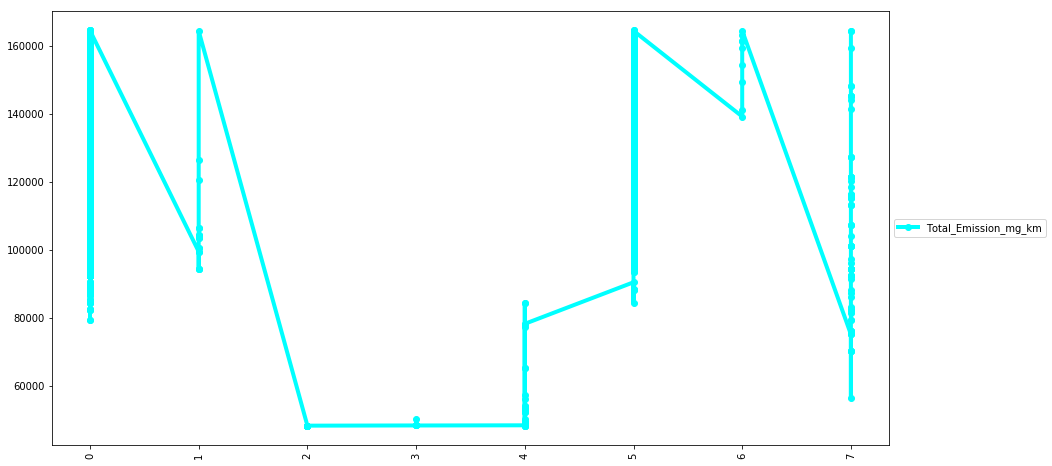

In [679]:
plt.plot( 'Fuel_Type_code' , 'Total_Emission_mg_km', data=cardf_normalized, marker='.', markerfacecolor='aqua', markersize=12, color='aqua', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

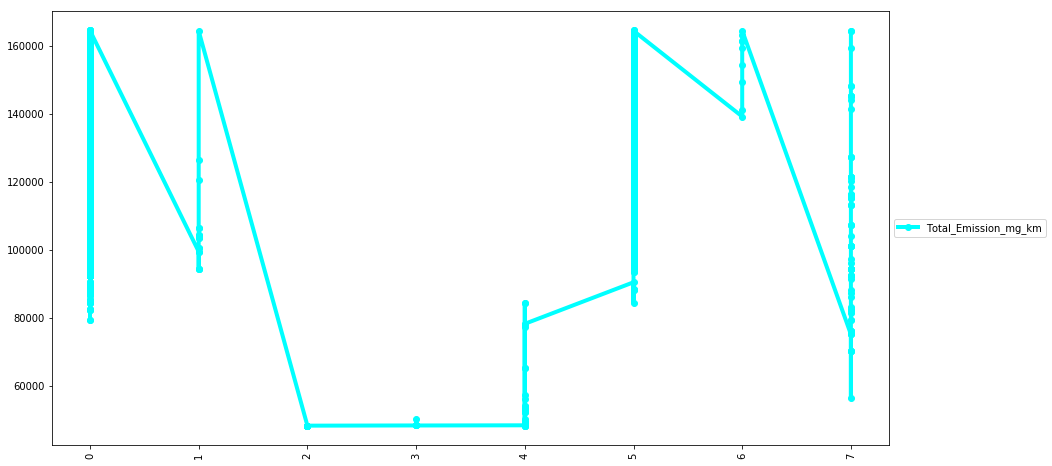

In [680]:
plt.plot( 'Fuel_Type_code' , 'Total_Emission_mg_km', data=cardf_notnormalized, marker='.', markerfacecolor='aqua', markersize=12, color='aqua', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [806]:
TotalEmission = list(cardf_normalized['Total_Emission_mg_km'])

In [807]:
#The values in the Total_Emission_mg_km column(This is the label in our case) and then convert them to specific string labels explained earlier.
for n,i in enumerate(TotalEmmission):
    if i < 60000.0:
        TotalEmission[n] = 'Green level'
    elif (i > 60000.0 and i < 128993.028):
        TotalEmission[n] = 'Acceptable Emission level'
    elif (i > 128993.028 and i < 148453.06):
        TotalEmission[n] = 'Not Acceptable Emission level'
    elif (i > 148453.06):
        TotalEmission[n] = 'Dangerous Emission Level'
    else:
        TotalEmission[n] = 'Emission Info Missing'

In [719]:
cardf_normalized['Total_Emission_mg_km'] = TotalEmission
cardf_notnormalized['Total_Emission_mg_km'] = TotalEmission

In [809]:
cardf_normalized.head()

Engine_Capacity  Electric_energy_consumption_Miles_kWh  wh_km  \
0           1248.0                                    0.0    0.0   
1           1496.0                                    0.0    0.0   
2           1496.0                                    0.0    0.0   
3           1560.0                                    0.0    0.0   
4           1560.0                                    0.0    0.0   

   Maximum_range_(Km)  Maximum_range_Miles  Metric_Urban_Cold  \
0                 0.0                  0.0                4.3   
1                 0.0                  0.0                3.9   
2                 0.0                  0.0                3.9   
3                 0.0                  0.0                3.7   
4                 0.0                  0.0                3.9   

   Metric_Extra_Urban  Metric_Combined  Imperial_Urban_Cold  \
0                 2.9              3.4                 58.9   
1                 3.1              3.4                 58.9   
2                 3.1              3.4                 58.9   
3                 3.1              3.3                 58.9   
4                 3.2              3.4                 58.9   

   Imperial_Extra_Urban  Imperial_Combined  Fuel Cost 12000 Miles  \
0                  74.3               68.9                  807.0   
1                  74.3               68.9                  807.0   
2                  74.3               68.9                  807.0   
3                  74.3               68.9                  784.0   
4                  74.3               68.9                  807.0   

   Electricity cost  Total cost / 12000 miles  Noise_Level_dBA  CO2_mg_km  \
0               0.0                     807.0             67.5    89000.0   
1               0.0                     807.0             68.0    89000.0   
2               0.0                     807.0             68.0    89000.0   
3               0.0                     784.0             68.8    86000.0   
4               0.0                     807.0             69.2    89000.0   

   Manufacturer_code  Transmission_code  Fuel_Type_code  \
0                  1                 29               0   
1                  5                 31               0   
2                  5                 31               0   
3                  8                 29               0   
4                  8                 20               0   

        Total_Emission_mg_km  
0  Acceptable Emission level  
1  Acceptable Emission level  
2  Acceptable Emission level  
3  Acceptable Emission level  
4  Acceptable Emission level

##### Data Manipulation for Model Selection and Principal Component Analysis

In [721]:
X_nn = cardf_notnormalized.iloc[:,0:19]
y_nn = cardf_notnormalized.iloc[:,-1]
X_n = cardf_normalized.iloc[:,0:19]
y_n = cardf_normalized.iloc[:,-1]
scaled_data = scaler.fit_transform(X_nn)
scaled_data

array([[-0.88859077, -0.07008274, -0.11782675, ..., -1.47174479,
         0.50042556, -0.98579687],
       [-0.58553785, -0.07008274, -0.11782675, ..., -1.20382408,
         0.69625673, -0.98579687],
       [-0.58553785, -0.07008274, -0.11782675, ..., -1.20382408,
         0.69625673, -0.98579687],
       ...,
       [ 1.86088123, -0.07008274, -0.11782675, ..., -0.46704212,
        -1.06622383,  1.78765677],
       [ 0.0278999 , -0.07008274, -0.11782675, ..., -0.13214124,
         0.40250997,  1.78765677],
       [ 0.0278999 , -0.07008274, -0.11782675, ..., -0.13214124,
         0.40250997,  1.78765677]])

In [722]:
scaled_data = scaler.fit_transform(X_n)
scaled_data

array([[-1.39088222,  0.        ,  0.        , ..., -1.47174479,
         0.50042556, -0.98579687],
       [-0.79729617,  0.        ,  0.        , ..., -1.20382408,
         0.69625673, -0.98579687],
       [-0.79729617,  0.        ,  0.        , ..., -1.20382408,
         0.69625673, -0.98579687],
       ...,
       [ 1.59140897,  0.        ,  0.        , ..., -0.46704212,
        -1.06622383,  1.78765677],
       [ 0.40423688,  0.        ,  0.        , ..., -0.13214124,
         0.40250997,  1.78765677],
       [ 0.40423688,  0.        ,  0.        , ..., -0.13214124,
         0.40250997,  1.78765677]])

In [723]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit_transform(X_nn)

array([[-4.56448197e+04,  4.17536324e+00,  5.89387297e+01,
        -1.69129902e+01, -1.98491475e+00],
       [-4.56408503e+04,  2.51900227e+02,  5.45591831e+01,
        -2.59778637e+01,  7.57601810e-01],
       [-4.56408503e+04,  2.51900227e+02,  5.45591831e+01,
        -2.59778637e+01,  7.57601810e-01],
       ...,
       [ 2.43906345e+04,  1.12977235e+03, -7.33204637e+01,
        -6.10017325e+01,  1.61007788e+01],
       [ 3.33668686e+04, -5.13579386e+02, -7.85033635e+01,
        -9.38406836e+00, -8.71732270e-01],
       [ 3.33668686e+04, -5.13579386e+02, -7.85033635e+01,
        -9.38406836e+00, -8.71732270e-01]])

In [724]:
pca.get_covariance()

array([[ 6.69809484e+05, -1.66288032e+01, -1.95991546e+03,
        -4.43099138e+03, -2.75150580e+03,  1.68104858e+03,
         7.68049484e+02,  1.11083235e+03, -4.83892740e+03,
        -5.45534102e+03, -5.47762432e+03,  2.57995837e+05,
        -5.83661623e+03,  2.52159221e+05,  3.67254466e+02,
         2.60996654e+07, -2.45066783e+03, -1.31473476e+03,
         5.73255559e+01],
       [-1.66288032e+01,  3.71296911e+01,  9.87492180e+00,
         1.12004351e+01,  6.95037504e+00, -6.48113090e-01,
        -4.39619183e-01, -4.11644427e-01, -1.84671041e+00,
        -2.78504588e+00,  3.98547082e+00, -9.73919423e+01,
         2.94142844e+01, -6.79776579e+01, -1.02033126e-01,
        -1.12131424e+04, -1.13551462e-01,  9.16553531e-02,
         2.19808446e-01],
       [-1.95991546e+03,  9.87492180e+00,  3.76991176e+02,
         4.48992275e+02,  2.78692768e+02, -1.48192243e+01,
        -1.02949305e+01, -9.43942263e+00, -9.81159464e+01,
        -1.33147691e+02,  5.92745364e+01, -2.21573013e+03,
    

In [725]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.99834409e-01, 1.54725161e-04, 8.28972933e-06, 1.95917640e-06,
       3.02239824e-07])

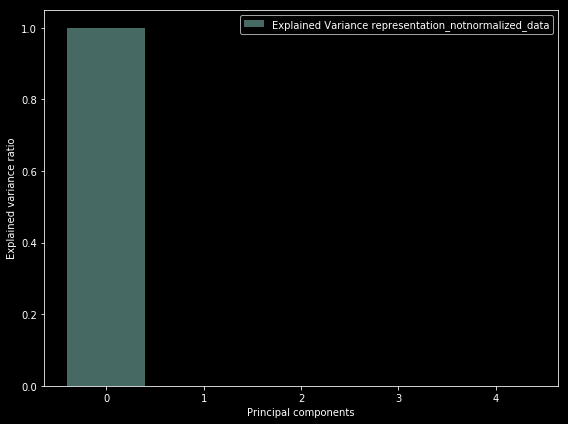

In [726]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',label='Explained Variance representation_notnormalized_data')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [727]:
pca_cardf_nn = pd.DataFrame(pca.components_,columns=X_nn.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [728]:
pca_cardf_nn.reset_index(inplace=True)
cm = sns.light_palette("red", as_cmap=True)
pca_cardf_nn.style.background_gradient(cmap='viridis')

In [729]:
pca.fit_transform(X_n)

array([[ 3.96644818e+04, -2.04633808e+02, -7.94242887e+01,
        -5.00684066e+00,  2.59276672e+01],
       [ 3.96621650e+04,  4.23114756e+01, -5.89403843e+01,
        -1.29481929e+01,  2.04150580e+01],
       [ 3.96621650e+04,  4.23114756e+01, -5.89403843e+01,
        -1.29481929e+01,  2.04150580e+01],
       ...,
       [-3.03524530e+04,  3.73467932e+02,  1.05868290e+02,
        -1.78890897e+01, -1.64574543e+00],
       [-3.53475975e+04, -1.64050707e+02,  2.82860559e+01,
         1.11546153e+01,  2.93217257e+00],
       [-3.53475975e+04, -1.64050707e+02,  2.82860559e+01,
         1.11546153e+01,  2.93217257e+00]])

In [730]:
pca.get_covariance()

array([[ 1.74590597e+05,  1.27058057e-12, -8.68477288e-13,
        -7.40499820e-15,  1.02852145e-16,  2.34548144e+02,
         1.63305251e+02,  1.85010241e+02, -1.61573135e+03,
        -2.10480989e+03, -1.95601658e+03,  4.44076372e+04,
        -5.84646756e-30,  4.33134533e+04,  1.55143641e+02,
         5.30183626e+06, -1.36417026e+03, -7.75777867e+02,
        -2.04900308e+02],
       [ 1.27058057e-12,  1.19235924e+01, -2.88725459e-29,
         5.37709912e-29, -1.60368993e-31, -8.01840439e-16,
        -2.34950045e-15,  1.47109940e-15, -1.23185211e-13,
        -1.43887297e-13, -6.47358281e-14,  2.79845534e-13,
         9.11592186e-45,  7.73941344e-13,  2.16130977e-15,
        -2.19752925e-14, -5.03546448e-15, -9.48823356e-15,
         1.02152478e-14],
       [-8.68477288e-13, -2.88725459e-29,  1.19235924e+01,
        -2.24791093e-29,  6.41475973e-31,  1.73527239e-15,
         8.28361802e-16,  5.83064493e-16,  1.33900027e-14,
         2.35232896e-14,  4.17648376e-15,  1.14311169e-13,
    

In [731]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.99761732e-01, 2.21944213e-04, 1.46093279e-05, 1.03232837e-06,
       3.87664970e-07])

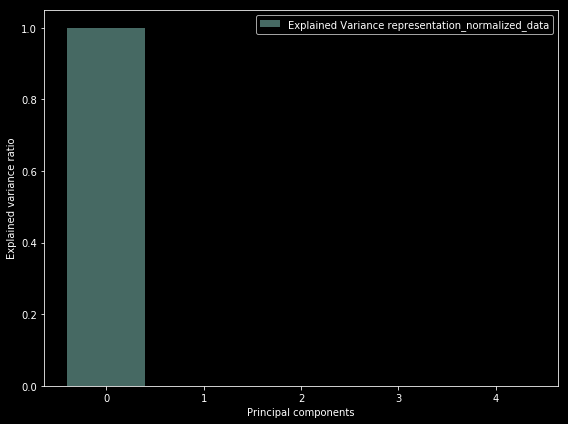

In [732]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',label='Explained Variance representation_normalized_data')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [802]:
pca_cardf_n = pd.DataFrame(pca.components_,columns=X_n.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [803]:
pca_cardf_n.reset_index(inplace=True)
cm = sns.light_palette("red", as_cmap=True)
pca_cardf_n.style.background_gradient(cmap='viridis')

#### Modelling, Precision check and Classification Reports

In [778]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

##### We perform SMOTE(Synthetic Minority Oversampling Technique) on the data since some of the labels have very low samples compared to the others and this could end up causing over fitting and poor performance in real life datasets

First we do it on the data that is not normalized

In [830]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.3, random_state=0)
columns = X_train_nn.columns
os_cardfnn_X,os_cardfnn_y=os.fit_sample(X_train_nn, y_train_nn)
os_cardfnn_X = pd.DataFrame(data=os_cardfnn_X,columns=columns )
os_cardfnn_y= pd.DataFrame(data=os_cardfnn_y,columns=['Total_Emission_mg_km'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_cardfnn_X))
print("Number of Info Missing in oversampled data",len(os_cardfnn_y[os_cardfnn_y['Total_Emission_mg_km']== 'Emission Info Missing']))
print("Number of Acceptable Emission Level",len(os_cardfnn_y[os_cardfnn_y['Total_Emission_mg_km']=='Acceptable Emission level']))
print("Number of Not Acceptable Emission Level",len(os_cardfnn_y[os_cardfnn_y['Total_Emission_mg_km']=='Not Acceptable Emission level']))
print("Number of Dangerous Emission Level",len(os_cardfnn_y[os_cardfnn_y['Total_Emission_mg_km']=='Dangerous Emission Level']))
print("Proportion of Info Missing data in oversampled data is ",len(os_cardfnn_y[os_cardfnn_y['Total_Emission_mg_km']=='Emission Info Missing'])/len(os_cardfnn_X))

length of oversampled data is  7524
Number of Info Missing in oversampled data 1881
Number of Acceptable Emission Level 1881
Number of Not Acceptable Emission Level 1881
Number of Dangerous Emission Level 1881
Proportion of Info Missing data in oversampled data is  0.25


Next we do it on the data that is normalized

In [812]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.3, random_state=0)
columns = X_train_n.columns
os_cardfn_X,os_cardfn_y=os.fit_sample(X_train_n, y_train_n)
os_cardfn_X = pd.DataFrame(data=os_cardfn_X,columns=columns )
os_cardfn_y= pd.DataFrame(data=os_cardfn_y,columns=['Total_Emission_mg_km'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_cardfn_X))
print("Number of Info Missing in oversampled data",len(os_cardfn_y[os_cardfn_y['Total_Emission_mg_km']== 'Emission Info Missing']))
print("Number of Acceptable Emission Level",len(os_cardfn_y[os_cardfn_y['Total_Emission_mg_km']=='Acceptable Emission level']))
print("Number of Not Acceptable Emission Level",len(os_cardfn_y[os_cardfn_y['Total_Emission_mg_km']=='Not Acceptable Emission level']))
print("Number of Dangerous Emission Level",len(os_cardfn_y[os_cardfn_y['Total_Emission_mg_km']=='Dangerous Emission Level']))
print("Proportion of Info Missing data in oversampled data is ",len(os_cardfn_y[os_cardfn_y['Total_Emission_mg_km']=='Emission Info Missing'])/len(os_cardfn_X))

length of oversampled data is  7524
Number of Info Missing in oversampled data 1881
Number of Acceptable Emission Level 1881
Number of Not Acceptable Emission Level 1881
Number of Dangerous Emission Level 1881
Proportion of Info Missing data in oversampled data is  0.25


We can test Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. On both the datasets

In [813]:
data_final_vars=cardf_normalized.columns.values.tolist()
y_n=['Total_Emission_mg_km']
X_n=[i for i in data_final_vars if i not in y_n]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_cardfn_X, os_cardfn_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [853]:
data_final_vars=cardf_notnormalized.columns.values.tolist()
y_nn=['Total_Emission_mg_km']
X_nn=[i for i in data_final_vars if i not in y_nn]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_cardfn_X, os_cardfn_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [832]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(os_cardfnn_X, os_cardfnn_y, test_size=0.2, random_state=42)

X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(os_cardfnn_X, os_cardfnn_y, test_size=0.25, random_state=42)

X_train_nn.shape, X_test_nn.shape, X_val_nn.shape

((5643, 19), (1505, 19), (1881, 19))

In [833]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(os_cardfn_X, os_cardfn_y, test_size=0.2, random_state=42)

X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(os_cardfn_X, os_cardfn_y, test_size=0.25, random_state=42)

X_train_n.shape, X_test_n.shape, X_val_n.shape

((5643, 19), (1505, 19), (1881, 19))

In [834]:
#Apply logistic regression on notnormalized data.
logit = LogisticRegression(random_state=42)

# train model
logit.fit(X_train_nn, y_train_nn.values.ravel())

# make predicion on test set
predproblogit_nn = logit.predict_proba(X_test_nn)
predlogit_nn = logit.predict(X_test_nn)
predlogitval_nn = logit.predict(X_val_nn)

print('LogReg Accuracy for notnormalized testing data: {}'.format(logit.score(X_test_nn, y_test_nn)))
print('LogReg Accuracy for notnormalized validation data: {}'.format(logit.score(X_val_nn, y_val_nn)))

LogReg Accuracy for notnormalized testing data: 0.9800664451827242
LogReg Accuracy for notnormalized validation data: 0.9750132908027644


In [825]:
#Apply logistic regression on normalized data.
logit = LogisticRegression(random_state=42)

# train model
logit.fit(X_train_n, y_train_n.values.ravel())
#logit.fit(X_val_n, y_train_n)

# make predicion on test set
predproblogit_n = logit.predict_proba(X_test_n)
predlogit_n = logit.predict(X_test_n)
predlogitval_n = logit.predict(X_val_n)

print('LogReg Accuracy for normalized testing data: {}'.format(logit.score(X_test_n, y_test_n)))
print('LogReg Accuracy for normalized validation data: {}'.format(logit.score(X_val_n, y_val_n)))

LogReg Accuracy for normalized testing data: 0.9607973421926911
LogReg Accuracy for normalized validation data: 0.9564061669324827


In [835]:
confusion_matrix_nn = confusion_matrix(y_test_nn, predlogit_nn)
confusion_matrix_n = confusion_matrix(y_test_n, predlogit_n)
print(confusion_matrix_nn)
print(confusion_matrix_n)

[[386   0   0  10]
 [  0 346   0   4]
 [  0   0 379   0]
 [  8   8   0 364]]
[[379   0   2  15]
 [  0 349   0   1]
 [  0   0 379   0]
 [ 26  15   0 339]]


In [836]:
print(classification_report(y_test_nn, predlogit_nn))

                               precision    recall  f1-score   support

    Acceptable Emission level       0.98      0.97      0.98       396
     Dangerous Emission Level       0.98      0.99      0.98       350
        Emission Info Missing       1.00      1.00      1.00       379
Not Acceptable Emission level       0.96      0.96      0.96       380

                  avg / total       0.98      0.98      0.98      1505



In [837]:
print(classification_report(y_test_n, predlogit_n))

                               precision    recall  f1-score   support

    Acceptable Emission level       0.94      0.96      0.95       396
     Dangerous Emission Level       0.96      1.00      0.98       350
        Emission Info Missing       0.99      1.00      1.00       379
Not Acceptable Emission level       0.95      0.89      0.92       380

                  avg / total       0.96      0.96      0.96      1505



In [838]:
#Apply AdaBoost on notnormalized data.
ada = AdaBoostClassifier(n_estimators=200, random_state=42)

# train model
ada.fit(X_train_nn, y_train_nn.values.ravel())

# make predictions
predada_nn = ada.predict(X_test_nn)
predprobtest = ada.predict_proba(X_test_nn)
#pred = ada.predict_proba(X_val_nn)

print('AdaBoost Accuracy for notnormalized testing data : {}'.format(ada.score(X_test_nn, y_test_nn)))
print('AdaBoost Accuracy for notnormalized validation data : {}'.format(ada.score(X_val_nn, y_val_nn)))

AdaBoost Accuracy for notnormalized testing data : 0.7355481727574751
AdaBoost Accuracy for notnormalized validation data : 0.7363104731525785


In [839]:
#Apply AdaBoost on normalized data.
ada = AdaBoostClassifier(n_estimators=200, random_state=42)

# train model
ada.fit(X_train_n, y_train_n.values.ravel())

# make predictions
predprob_n = ada.predict_proba(X_test_n)
predada_n = ada.predict(X_test_n)
#predval = ada.predict_proba(X_val_n)

print('AdaBoost Accuracy for normalized testing data : {}'.format(ada.score(X_test_n, y_test_n)))
print('AdaBoost Accuracy for normalized validation data : {}'.format(ada.score(X_val_n, y_val_n)))

AdaBoost Accuracy for normalized testing data : 0.7355481727574751
AdaBoost Accuracy for normalized validation data : 0.7363104731525785


In [840]:
confusion_matrix_nn = confusion_matrix(y_test_nn, predada_nn)
confusion_matrix_n = confusion_matrix(y_test_n, predada_n)
print(confusion_matrix_nn)
print(confusion_matrix_n)

[[  0   0 396   0]
 [  0 348   0   2]
 [  0   0 379   0]
 [  0   0   0 380]]
[[  0   0 396   0]
 [  0 348   0   2]
 [  0   0 379   0]
 [  0   0   0 380]]


In [841]:
print(classification_report(y_test_n, predada_n))

                               precision    recall  f1-score   support

    Acceptable Emission level       0.00      0.00      0.00       396
     Dangerous Emission Level       1.00      0.99      1.00       350
        Emission Info Missing       0.49      1.00      0.66       379
Not Acceptable Emission level       0.99      1.00      1.00       380

                  avg / total       0.61      0.74      0.65      1505



c:\users\tempsudei\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [854]:
print(classification_report(y_test_nn, predada_nn))

                               precision    recall  f1-score   support

    Acceptable Emission level       0.00      0.00      0.00       396
     Dangerous Emission Level       1.00      0.99      1.00       350
        Emission Info Missing       0.49      1.00      0.66       379
Not Acceptable Emission level       0.99      1.00      1.00       380

                  avg / total       0.61      0.74      0.65      1505



c:\users\tempsudei\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [848]:
#Apply RandomForest Classifier on notnormalized data.
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# train model
rf.fit(X_train_nn, y_train_nn.values.ravel())

# make predictions
predrftest_nn = rf.predict(X_test_nn)
predrfval_nn = rf.predict(X_val_nn)

print('Random Forests Accuracy for notnormalized testing data: {}'.format(rf.score(X_test_nn, y_test_nn)))
print('Random Forests Accuracy for notnormalized validation data: {}'.format(rf.score(X_val_nn, y_val_nn)))

Random Forests Accuracy for notnormalized testing data: 0.998671096345515
Random Forests Accuracy for notnormalized validation data: 0.998936735778841


In [849]:
#Apply RandomForest Classifier on normalized data.
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# train model
rf.fit(X_train_n, y_train_n.values.ravel())

# make predictions
predrftest_n = rf.predict(X_test_n)
predrfval_n = rf.predict(X_test_n)
predprobval = rf.predict_proba(X_val_n)

print('Random Forests Accuracy for normalized testing data: {}'.format(rf.score(X_test_n, y_test_n)))
print('Random Forests Accuracy for normalized validation data: {}'.format(rf.score(X_val_n, y_val_n)))

Random Forests Accuracy for normalized testing data: 0.998671096345515
Random Forests Accuracy for normalized validation data: 0.998936735778841


In [850]:
confusion_matrix_nn = confusion_matrix(y_test_nn, predrftest_n)
confusion_matrix_n = confusion_matrix(y_test_n, predrfval_n)
print(confusion_matrix_nn)
print(confusion_matrix_n)

[[396   0   0   0]
 [  1 348   0   1]
 [  0   0 379   0]
 [  0   0   0 380]]
[[396   0   0   0]
 [  1 348   0   1]
 [  0   0 379   0]
 [  0   0   0 380]]


In [851]:
print(classification_report(y_test_nn, predrftest_nn))

                               precision    recall  f1-score   support

    Acceptable Emission level       1.00      1.00      1.00       396
     Dangerous Emission Level       1.00      0.99      1.00       350
        Emission Info Missing       1.00      1.00      1.00       379
Not Acceptable Emission level       1.00      1.00      1.00       380

                  avg / total       1.00      1.00      1.00      1505



In [852]:
print(classification_report(y_test_n, predrftest_n))

                               precision    recall  f1-score   support

    Acceptable Emission level       1.00      1.00      1.00       396
     Dangerous Emission Level       1.00      0.99      1.00       350
        Emission Info Missing       1.00      1.00      1.00       379
Not Acceptable Emission level       1.00      1.00      1.00       380

                  avg / total       1.00      1.00      1.00      1505



In [846]:
data = {'Algorithm': ['Logistic Regression_Testing','Logistic Regression_Validation', 'AdaBoost Classifier_Testing','AdaBoost Classifier_Validation', 'Random Forest Classifier_Testing','Random Forest Classifier_Validation'],
         'Normalized Data Scores': [logit.score(X_test_n, y_test_n), logit.score(X_val_n, y_val_n), ada.score(X_test_n, y_test_n), ada.score(X_val_n, y_val_n), rf.score(X_test_n, y_test_n), rf.score(X_val_n, y_val_n)],
         'Not Normalized Data Scores': [logit.score(X_test_nn, y_test_nn), logit.score(X_val_nn, y_val_nn), ada.score(X_test_nn, y_test_nn), ada.score(X_val_nn, y_val_nn), rf.score(X_test_nn, y_test_nn), rf.score(X_val_nn, y_val_nn)],
         }
Report = pd.DataFrame(data)

In [847]:
Report

Algorithm  Normalized Data Scores  \
0          Logistic Regression_Testing                0.724917   
1       Logistic Regression_Validation                0.719298   
2          AdaBoost Classifier_Testing                0.735548   
3       AdaBoost Classifier_Validation                0.736310   
4     Random Forest Classifier_Testing                0.998671   
5  Random Forest Classifier_Validation                0.998937   

   Not Normalized Data Scores  
0                    0.980066  
1                    0.975013  
2                    0.735548  
3                    0.736310  
4                    0.998671  
5                    0.998937

#### Summary:

We can notice that Random Forest seem to have very high Accuracy, precision and recall scores. It seems to perform well on the validation data as well. Logistic Regression is a very close contentder too.
From the outcomes we can understand that we dont really have to remove the outliers in the data, since they are not actually outliers. Also using tree classification algorithms we can obtain quite a good machine learning model to predict if a car is highly emissive or not.